## EDA
1. 데이터 타입 확인
2. 범주형 데이터 분석
3. 수치형 데이터 분석

-----------------------

## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul
from scipy.stats import levene, shapiro, t, chi2_contingency, f_oneway, kruskal, stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, LabelEncoder
from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

Hangul OK in your MAC!


In [2]:
df = pd.read_csv('../data/1st_train_mdf.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 데이터 정의서 요약

| Original Column   | Translated Column       |
|-------------------|-------------------------|
| Id                | 아이디                  |
| MSSubClass        | 건물 등급               |
| MSZoning          | 용도 지역               |
| LotFrontage       | 도로 연접 길이          |
| LotArea           | 대지 면적               |
| Street            | 도로 유형               |
| Alley             | 골목 유형               |
| LotShape          | 대지 형태               |
| LandContour       | 대지 윤곽               |
| Utilities         | 사용 가능 설비          |
| LotConfig         | 대지 구성               |
| LandSlope         | 대지 경사               |
| Neighborhood      | 인근 지역               |
| Condition1        | 근접 조건 1             |
| Condition2        | 근접 조건 2             |
| BldgType          | 건물 유형               |
| HouseStyle        | 주택 스타일             |
| OverallQual       | 전반적 품질             |
| OverallCond       | 전반적 상태             |
| YearBuilt         | 건축 연도               |
| YearRemodAdd      | 리모델링 연도           |
| RoofStyle         | 지붕 스타일             |
| RoofMatl          | 지붕 재질               |
| Exterior1st       | 외장재 1                |
| Exterior2nd       | 외장재 2                |
| MasVnrType        | 석조 베니어 유형        |
| MasVnrArea        | 석조 베니어 면적        |
| ExterQual         | 외장재 품질             |
| ExterCond         | 외장재 상태             |
| Foundation        | 기초 유형               |
| BsmtQual          | 지하실 품질             |
| BsmtCond          | 지하실 상태             |
| BsmtExposure      | 지하실 노출             |
| BsmtFinType1      | 지하실 마감 유형 1      |
| BsmtFinSF1        | 지하실 마감 면적 1      |
| BsmtFinType2      | 지하실 마감 유형 2      |
| BsmtFinSF2        | 지하실 마감 면적 2      |
| BsmtUnfSF         | 지하실 미마감 면적      |
| TotalBsmtSF       | 지하실 총 면적          |
| Heating           | 난방 유형               |
| HeatingQC         | 난방 품질               |
| CentralAir        | 중앙 냉방               |
| Electrical        | 전기 설비               |
| 1stFlrSF          | 1층 면적                |
| 2ndFlrSF          | 2층 면적                |
| LowQualFinSF      | 저품질 마감 면적        |
| GrLivArea         | 지상 생활 면적          |
| BsmtFullBath      | 지하실 욕실(전체)       |
| BsmtHalfBath      | 지하실 욕실(부분)       |
| FullBath          | 욕실(전체)              |
| HalfBath          | 욕실(부분)              |
| BedroomAbvGr      | 지상 층 침실 수         |
| KitchenAbvGr      | 지상 층 주방 수         |
| KitchenQual       | 주방 품질               |
| TotRmsAbvGrd      | 지상 층 총 방 수        |
| Functional        | 기능성                  |
| Fireplaces        | 벽난로 수               |
| FireplaceQu       | 벽난로 품질             |
| GarageType        | 차고 유형               |
| GarageYrBlt       | 차고 건축 연도          |
| GarageFinish      | 차고 마감 상태          |
| GarageCars        | 차고 차량 수용 능력     |
| GarageArea        | 차고 면적               |
| GarageQual        | 차고 품질               |
| GarageCond        | 차고 상태               |
| PavedDrive        | 포장 도로               |
| WoodDeckSF        | 목재 데크 면적          |
| OpenPorchSF       | 개방형 현관 면적        |
| EnclosedPorch     | 밀폐형 현관 면적        |
| 3SsnPorch         | 3계절용 현관 면적       |
| ScreenPorch       | 스크린 현관 면적        |
| PoolArea          | 수영장 면적             |
| PoolQC            | 수영장 품질             |
| Fence             | 울타리 품질             |
| MiscFeature       | 기타 특징               |
| MiscVal           | 기타 가치               |
| MoSold            | 판매 월                 |
| YrSold            | 판매 연도               |
| SaleType          | 판매 유형               |
| SaleCondition     | 판매 조건               |
| SalePrice         | 판매 가격               |

### 1. 데이터 타입 확인

In [3]:
def data_type_check(df):
    objects = df.select_dtypes(include=['object']).columns
    num = df.select_dtypes(include=['number']).columns

    print(f"Str dtypes: {len(objects)}개")
    print(f"Num dtypes: {len(num)}개")

data_type_check(df)

Str dtypes: 43개
Num dtypes: 38개


#### 위 데이터 타입 확인 결과 
- MSSubClass: 수치형이지만 실제로는 범주형
 - MoSold: 수치형이지만 월별 특성을 분석하기 위해 str 변환

In [4]:
# 위 결과를 토대로 데이터 타입 변경
df['MSSubClass'] = df['MSSubClass'].astype('str')
df['MoSold'] = df['MoSold'].astype('str')
df = df.drop(columns=['Id']) # 고유 식별자 Id 컬럼 제거

data_type_check(df) # 확인

Str dtypes: 45개
Num dtypes: 35개


#### NA 값 정보
| 컬럼명                        | 설명                                      | NA의 의미                     |
|-------------------------------|------------------------------------------|------------------------------|
| **Alley** (골목 유형)         | NA: No alley access                     | 골목 접근 없음                |
| **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinType2** (지하실 관련 속성) | NA: No Basement              | 지하실 없음                   |
| **FireplaceQu** (벽난로 품질) | NA: No Fireplace                        | 벽난로 없음                   |
| **GarageType**, **GarageFinish**, **GarageQual**, **GarageCond** (차고 관련 속성) | NA: No Garage                 | 차고 없음                     |
| **PoolQC** (수영장 품질)      | NA: No Pool                             | 수영장 없음                   |
| **Fence** (울타리 품질)       | NA: No Fence                            | 울타리 없음                   |
| **MiscFeature** (기타 특징)   | NA: None                                | 기타 특징 없음                |

In [5]:
df_nan = df[df.columns[df.isnull().any()]] # NaN 값이 있는 컬럼 확인
df_not_nan = df[df.columns[~df.isnull().any()]] # NaN 값이 없는 컬럼 확인

print(f"NaN Columns: {df_nan.shape[1]}")
print(f"NOT NaN Columns: {df_not_nan.shape[1]}")

NaN Columns: 19
NOT NaN Columns: 61


In [6]:
df_nan.isna().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/1788470345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_df.index, y=null_df, palette='Blues_r')


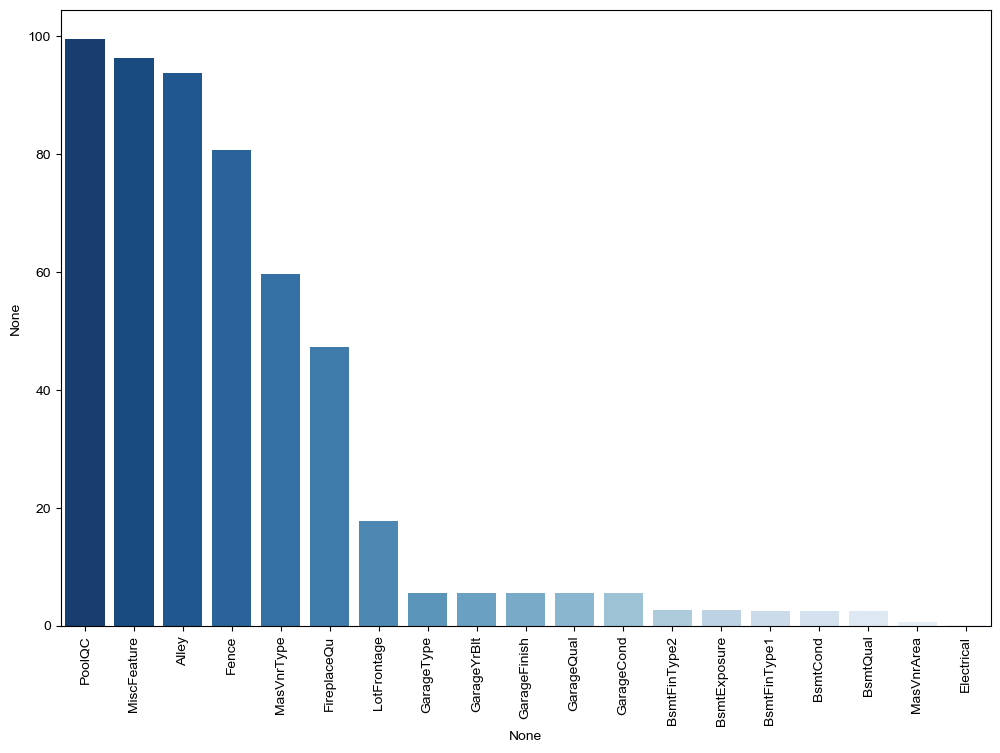

In [8]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90, fontsize=10)
sns.barplot(x=null_df.index, y=null_df, palette='Blues_r')
plt.show()

In [9]:
def fill_missing_values(df, num_col=0, mode_fill_cols=None):
    df_copy = df.copy()  

    if mode_fill_cols is None:
        mode_fill_cols = []  # 최빈값으로 대체할 컬럼 리스트 초기화

    # 최빈값으로 결측값 대체
    for col in mode_fill_cols:
        if col in df_copy.columns:
            mode_value = df_copy[col].mode()[0]  # 최빈값 계산
            df_copy[col] = df_copy[col].fillna(mode_value)

    # 범주형 데이터의 결측값 처리
    str_col = df_copy.select_dtypes(include=['object']).columns
    for col in str_col:
        if col in df_copy.columns:
            df_copy[col] = df_copy[col].fillna(f"No_{col}")
            
    # 수치형 데이터의 결측값 처리
    numeric_columns = df_copy.select_dtypes(include=['number']).columns
    df_copy[numeric_columns] = df_copy[numeric_columns].fillna(num_col)

    return df_copy

# 변수 리스트 및 실행
mode_fill_cols = ['LotFrontage']  # 최빈값으로 대체할 변수 리스트

# 데이터프레임 결측값 처리
df = fill_missing_values(df, mode_fill_cols=mode_fill_cols)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,No_PoolQC,No_Fence,No_MiscFeature,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No_Alley,Reg,Lvl,AllPub,FR2,...,0,No_PoolQC,No_Fence,No_MiscFeature,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No_Alley,IR1,Lvl,AllPub,Inside,...,0,No_PoolQC,No_Fence,No_MiscFeature,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No_Alley,IR1,Lvl,AllPub,Corner,...,0,No_PoolQC,No_Fence,No_MiscFeature,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No_Alley,IR1,Lvl,AllPub,FR2,...,0,No_PoolQC,No_Fence,No_MiscFeature,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,No_PoolQC,No_Fence,No_MiscFeature,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,No_PoolQC,MnPrv,No_MiscFeature,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,No_PoolQC,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,No_PoolQC,No_Fence,No_MiscFeature,0,4,2010,WD,Normal,142125


In [10]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

### 2. 범주형 데이터 분석

In [11]:
objects_df = df.select_dtypes(include=['object'])
objects_df

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,2,WD,Normal
1,20,RL,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,5,WD,Normal
2,60,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,9,WD,Normal
3,70,RL,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,2,WD,Abnorml
4,60,RL,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,12,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,8,WD,Normal
1456,20,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,No_PoolQC,MnPrv,No_MiscFeature,2,WD,Normal
1457,70,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,No_PoolQC,GdPrv,Shed,5,WD,Normal
1458,20,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,No_PoolQC,No_Fence,No_MiscFeature,4,WD,Normal


고유값 평균: 6.53
평균 이상의 고유값을 가진 컬럼: 14
평균 이하의 고유값을 가진 컬럼: 31


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/2236970937.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Unique Count', data=unique_df, palette='viridis')


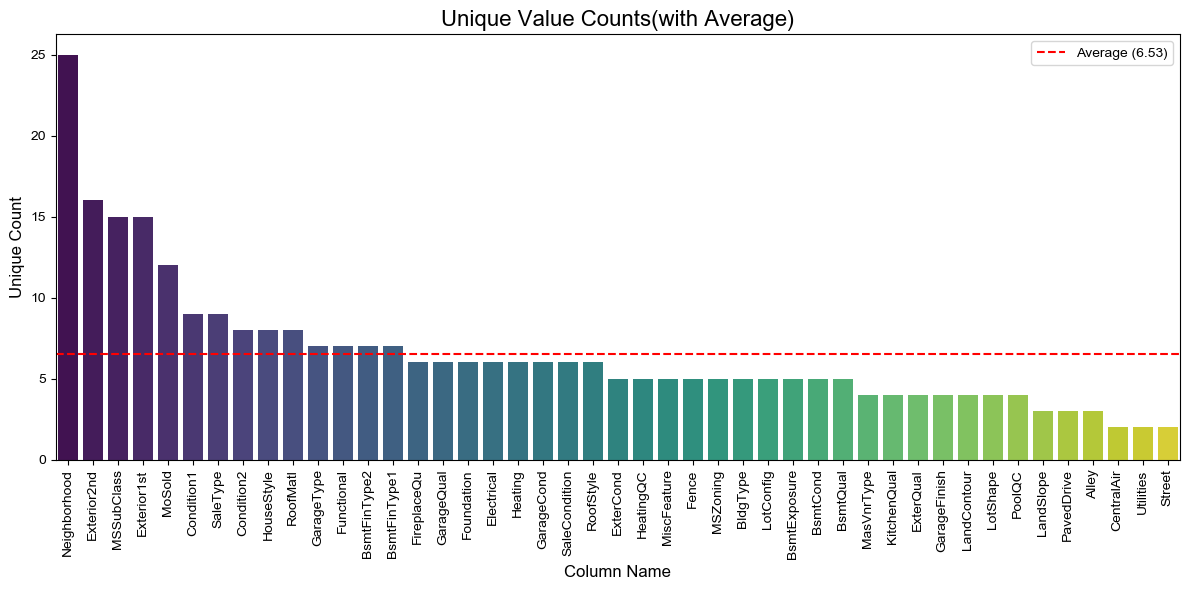

In [12]:
# 각 컬럼별 고유값 개수 계산
unique_counts = []
columns = objects_df.columns

for col in columns:
    unique_cnt = objects_df[col].nunique()
    unique_counts.append(unique_cnt)

# 고유값 개수의 평균 계산
mean_unique_col = round(sum(unique_counts) / len(unique_counts), 2)

# 시각화 데이터프레임 생성
unique_df = pd.DataFrame({
    'Column': columns,
    'Unique Count': unique_counts}).sort_values(by=['Unique Count'], ascending=False).reset_index(drop=True) # 고유값 개수 기준 내림차순

high_unique_cols = unique_df[unique_df['Unique Count'] >= mean_unique_col]['Column']
row_unique_cols = unique_df[unique_df['Unique Count'] <= mean_unique_col]['Column']

print(f"고유값 평균: {mean_unique_col}")
print(f"평균 이상의 고유값을 가진 컬럼: {len(high_unique_cols)}")
print(f"평균 이하의 고유값을 가진 컬럼: {len(row_unique_cols)}")

# 그래프 설정 및 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='Column', y='Unique Count', data=unique_df, palette='viridis')
plt.axhline(mean_unique_col, color='red', linestyle='--', label=f'Average ({mean_unique_col})') # 평균선을 추가
plt.title('Unique Value Counts(with Average)', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # X축 컬럼명 회전
plt.ylabel('Unique Count', fontsize=12)
plt.xlabel('Column Name', fontsize=12)
plt.legend()  # 범례 추가
plt.tight_layout()  # 레이아웃 조정
plt.show();

#### 2-1. 평균 이상 고유값을 가진 컬럼 분포 시각화

Neighborhood 고유값 개수: 25


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


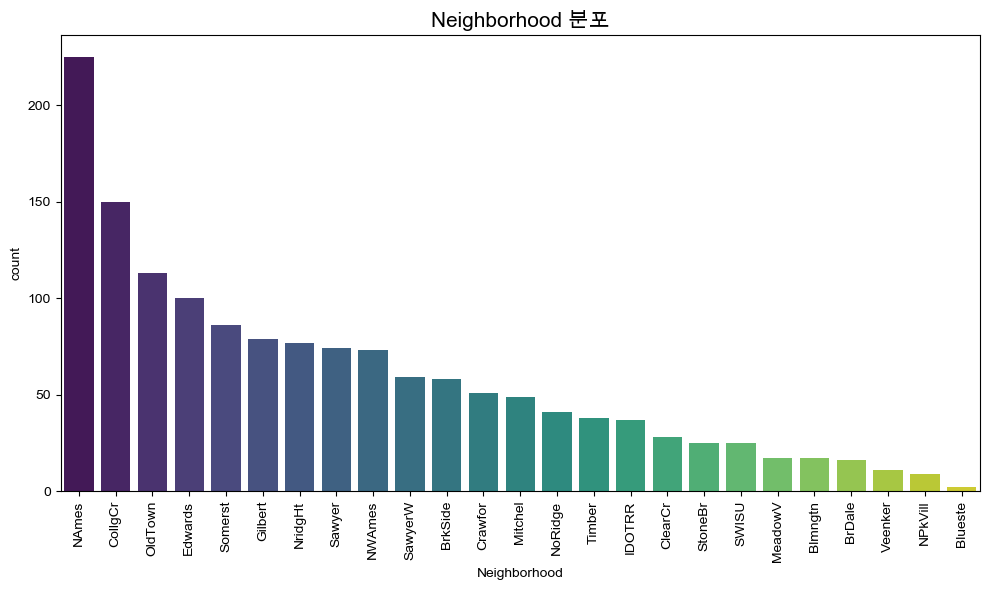

Exterior2nd 고유값 개수: 16


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


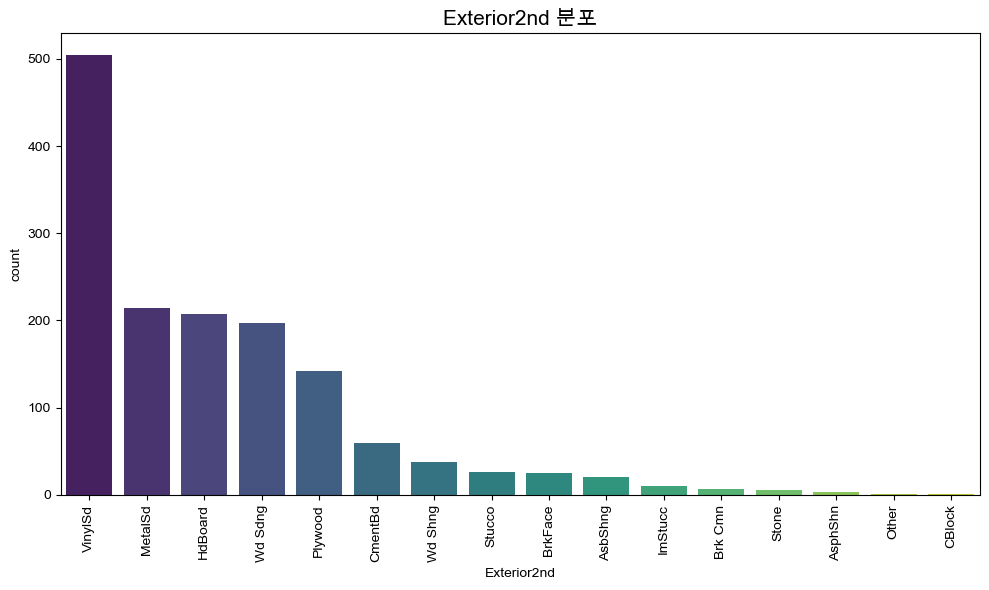

/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


MSSubClass 고유값 개수: 15


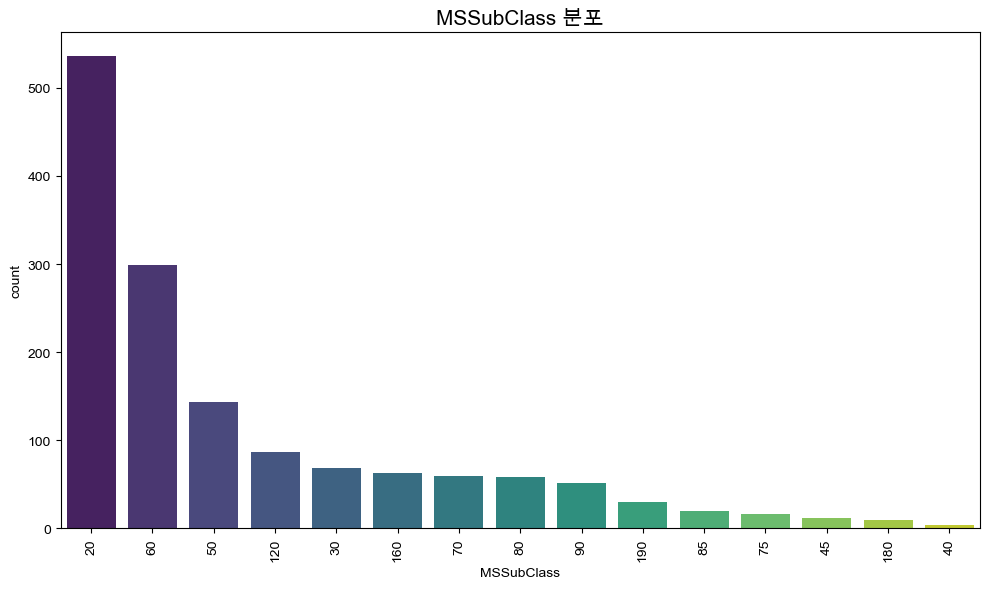

Exterior1st 고유값 개수: 15


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


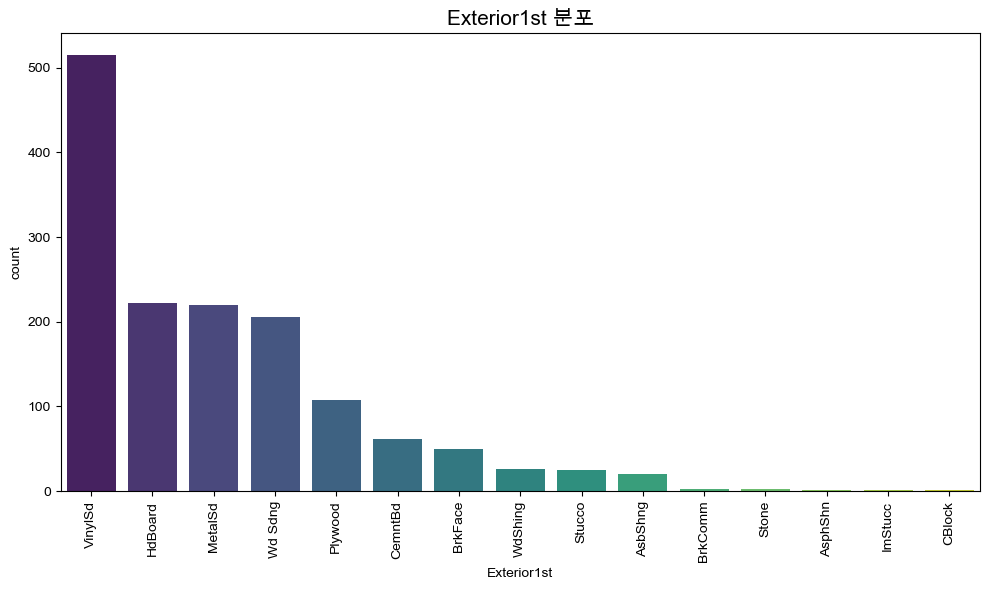

MoSold 고유값 개수: 12


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


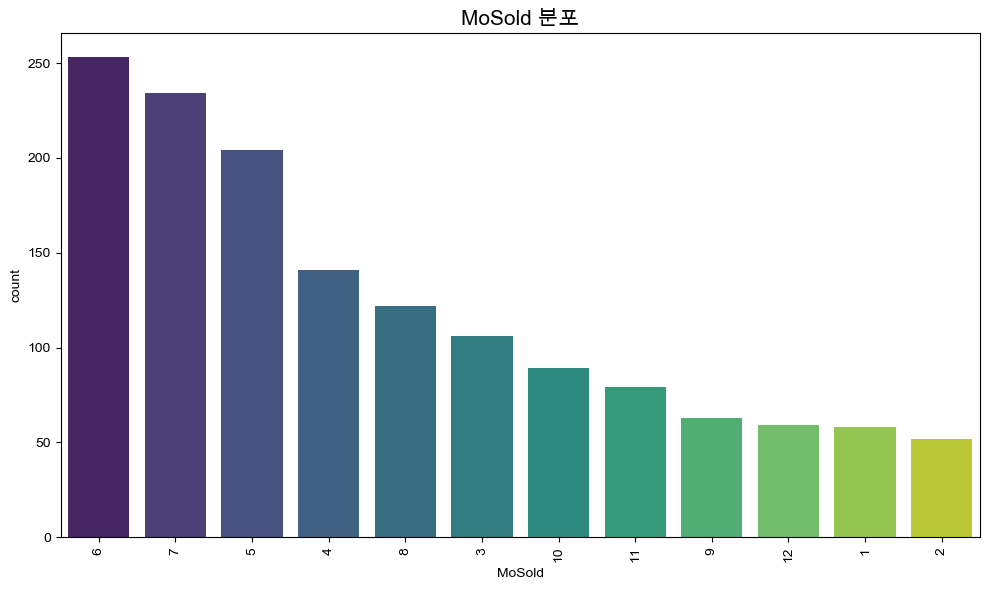

Condition1 고유값 개수: 9


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


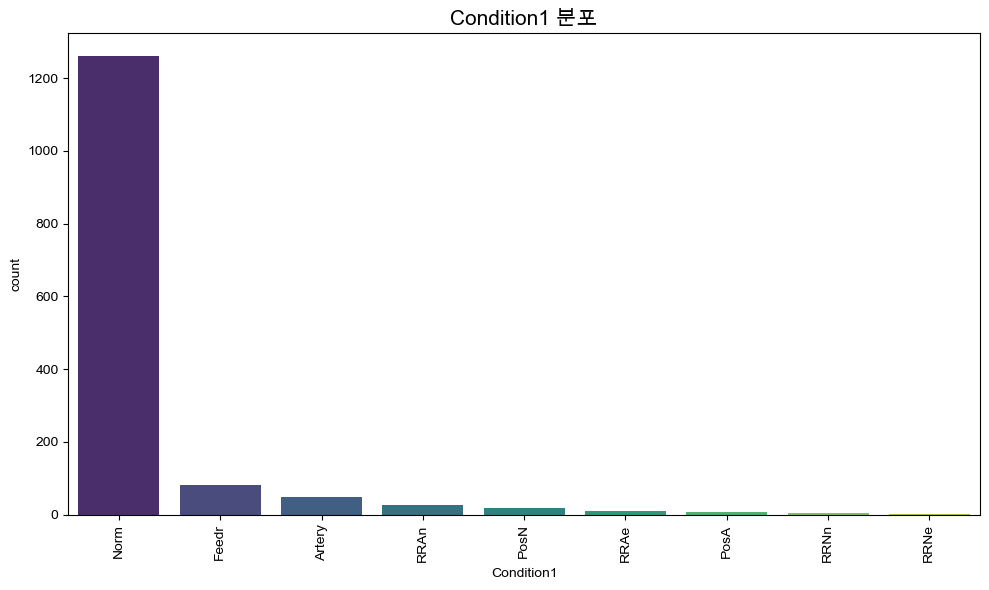

SaleType 고유값 개수: 9


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


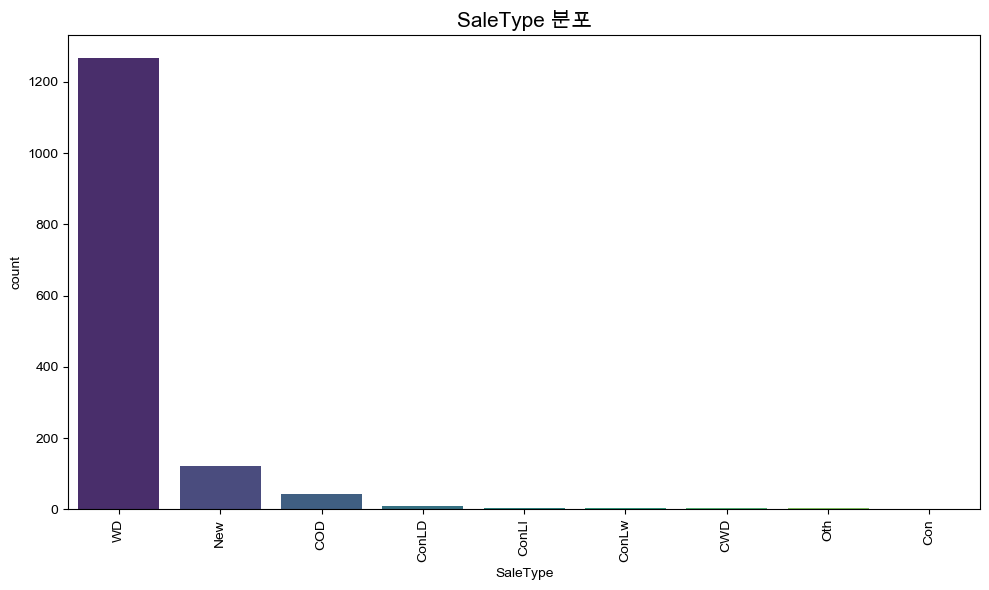

Condition2 고유값 개수: 8


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


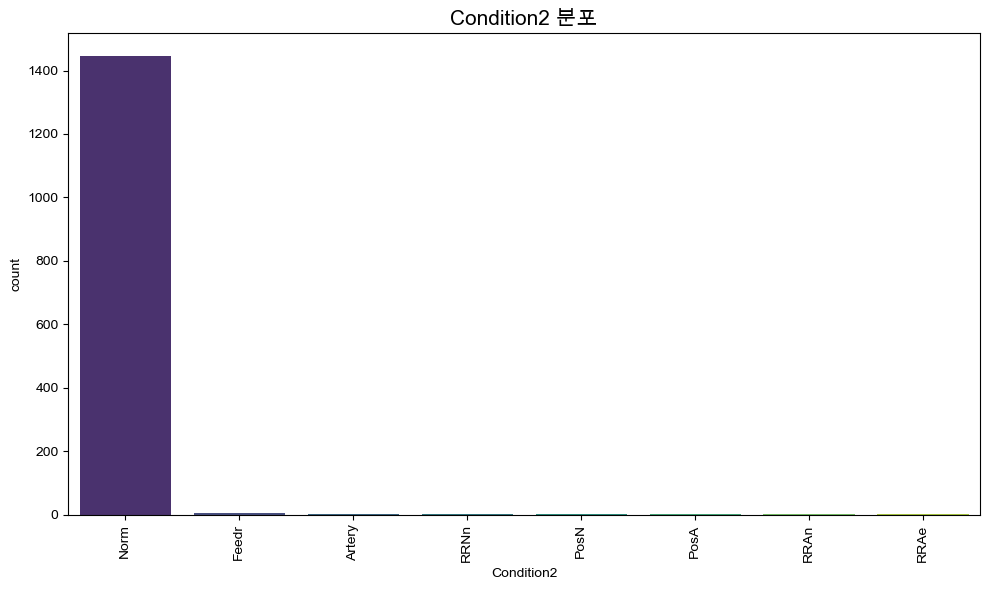

HouseStyle 고유값 개수: 8


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


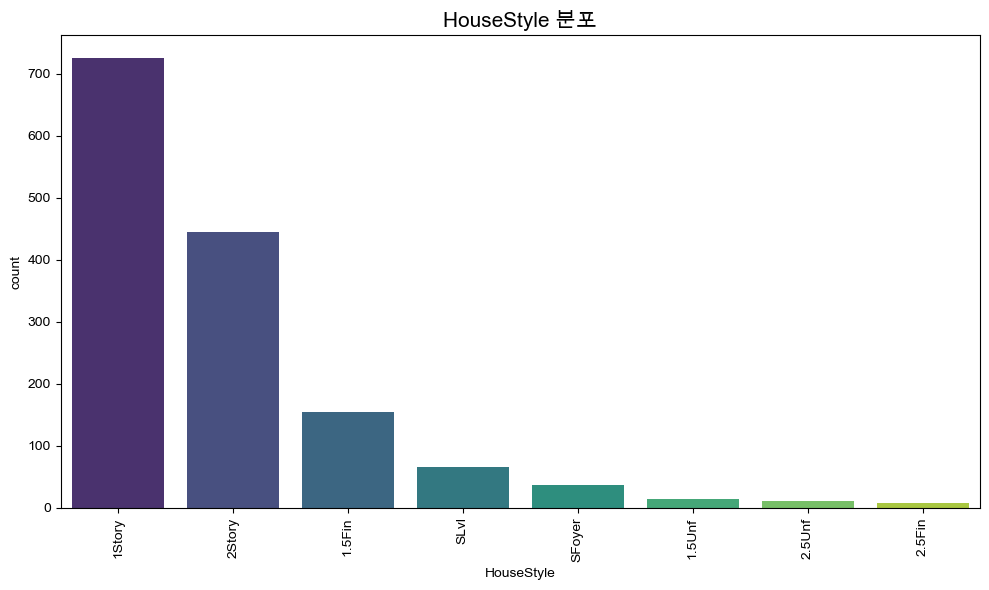

RoofMatl 고유값 개수: 8


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


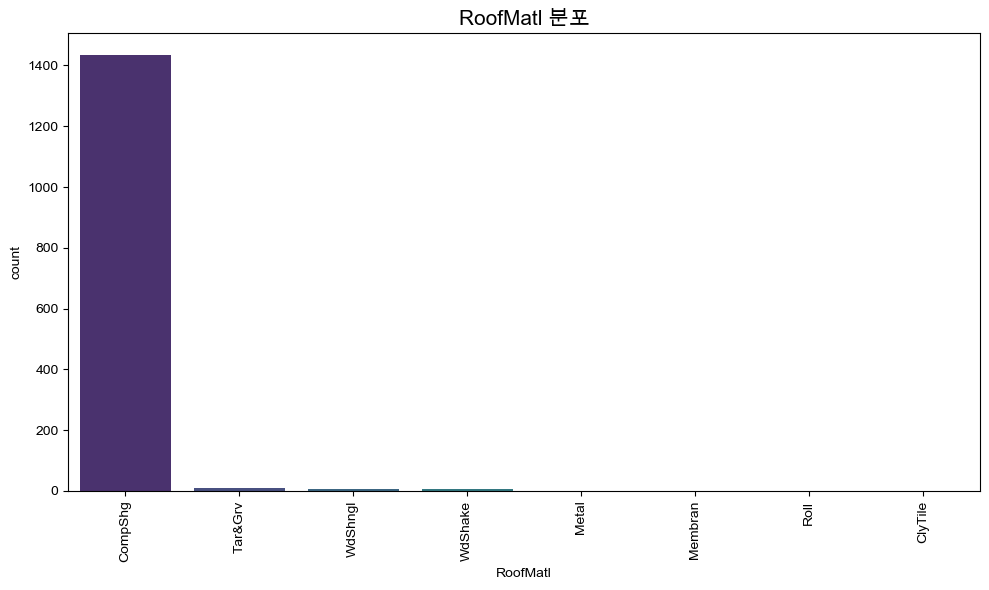

GarageType 고유값 개수: 7


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


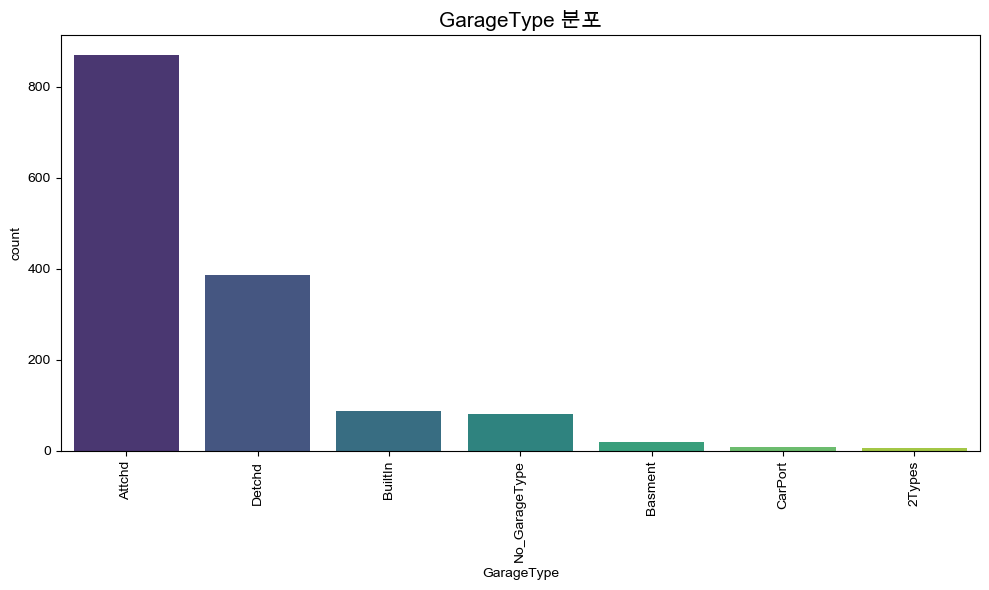

Functional 고유값 개수: 7


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


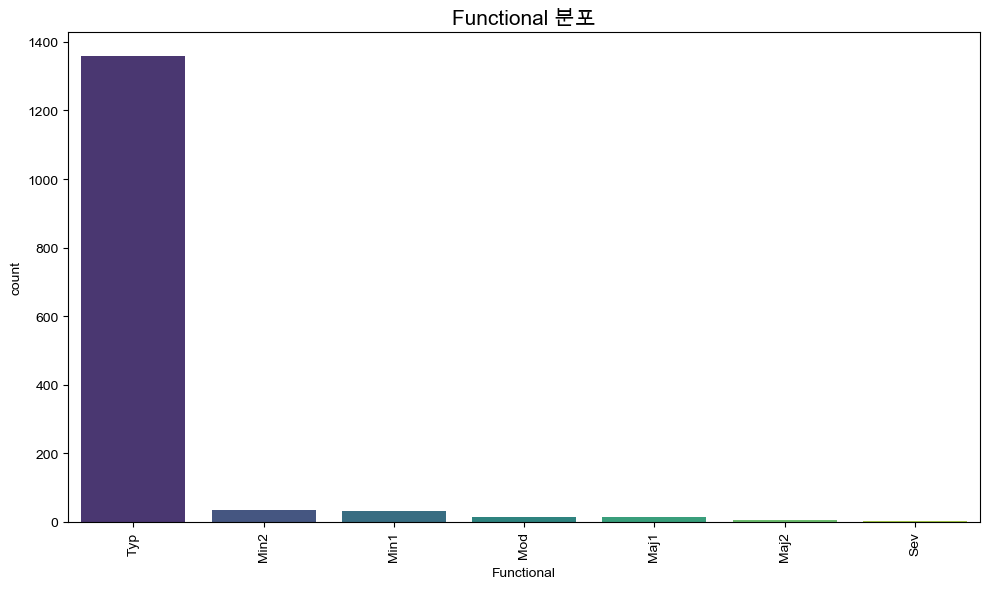

BsmtFinType2 고유값 개수: 7


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


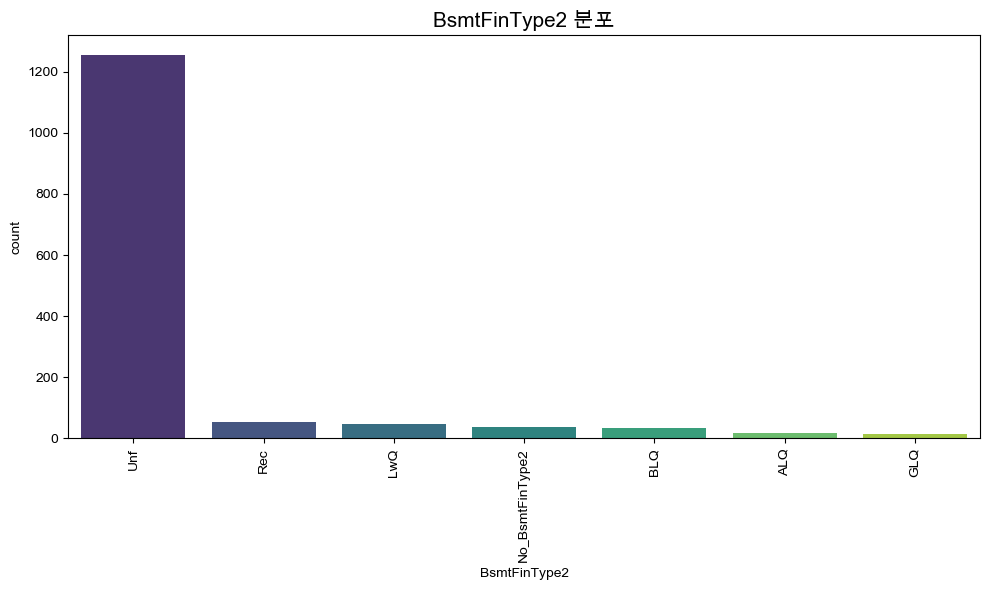

BsmtFinType1 고유값 개수: 7


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/67128321.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='viridis')


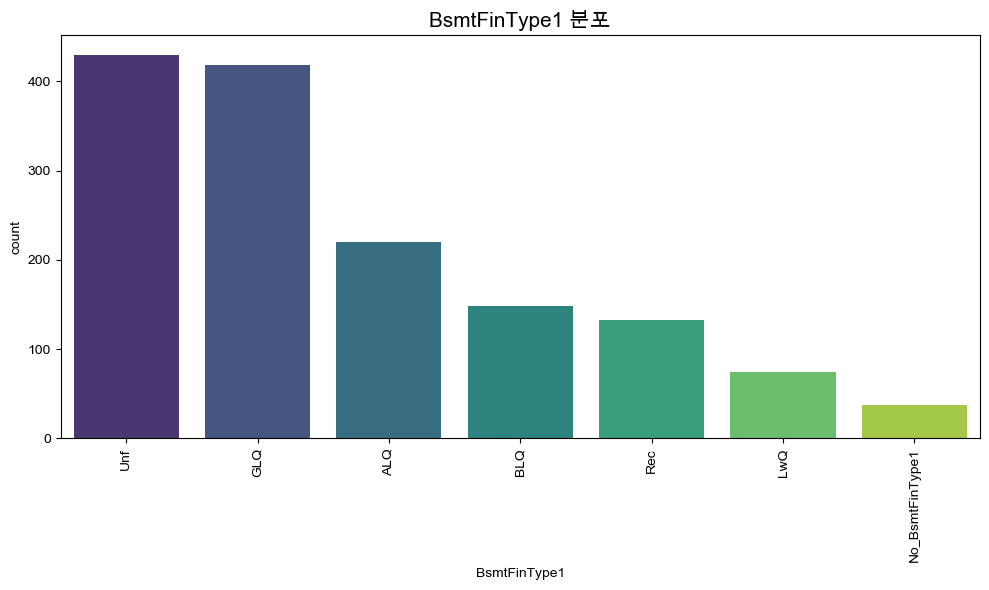

In [13]:
# 평균 이상 고유값을 가진 컬럼 시각화
for col in high_unique_cols:
    plt.figure(figsize=(10, 6))
    # 데이터 정렬
    value_counts = objects_df[col].value_counts()
    sorted_data = objects_df.copy()
    sorted_data[col] = pd.Categorical(sorted_data[col], categories=value_counts.index, ordered=True)
    print(f"{col} 고유값 개수: {len(value_counts)}")

    sns.countplot(x=col, data=sorted_data, palette='viridis')
    plt.title(f'{col} 분포', fontsize=15)
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

#### 2-2. 평균 이하 고유값을 가진 컬럼 분포 시각화

FireplaceQu 고유값 개수: 6


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


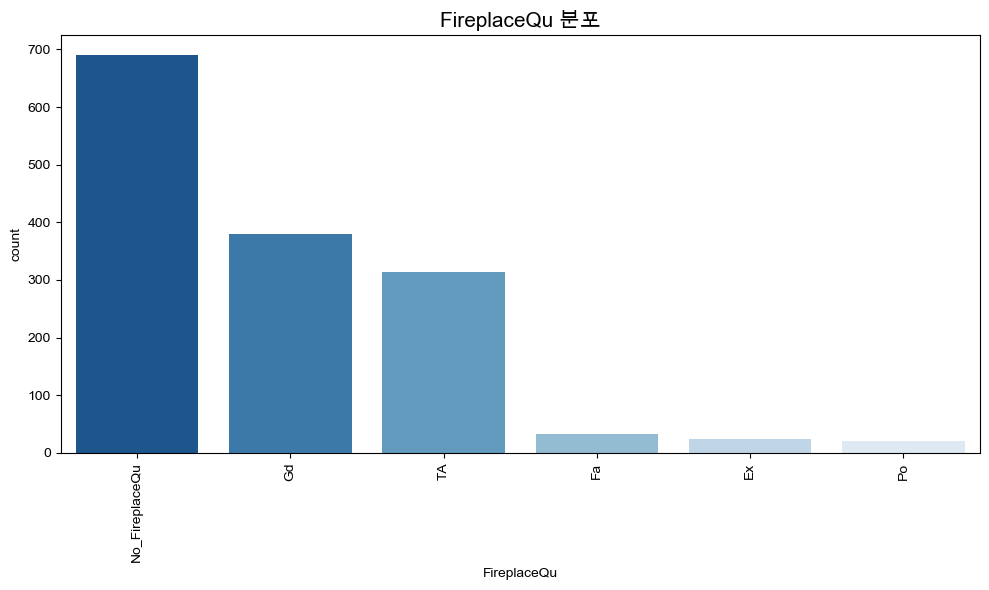

GarageQual 고유값 개수: 6


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


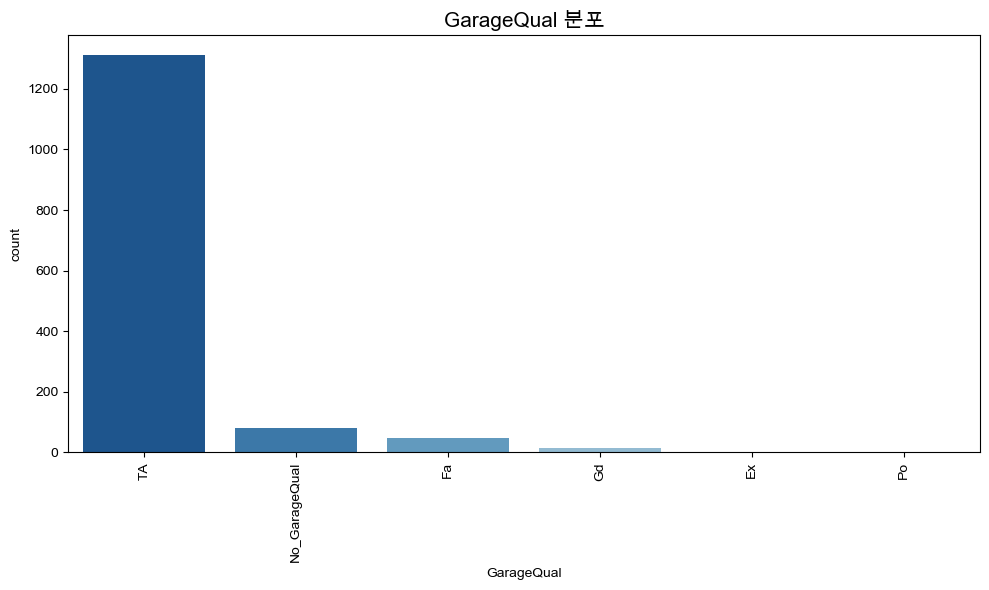

Foundation 고유값 개수: 6


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


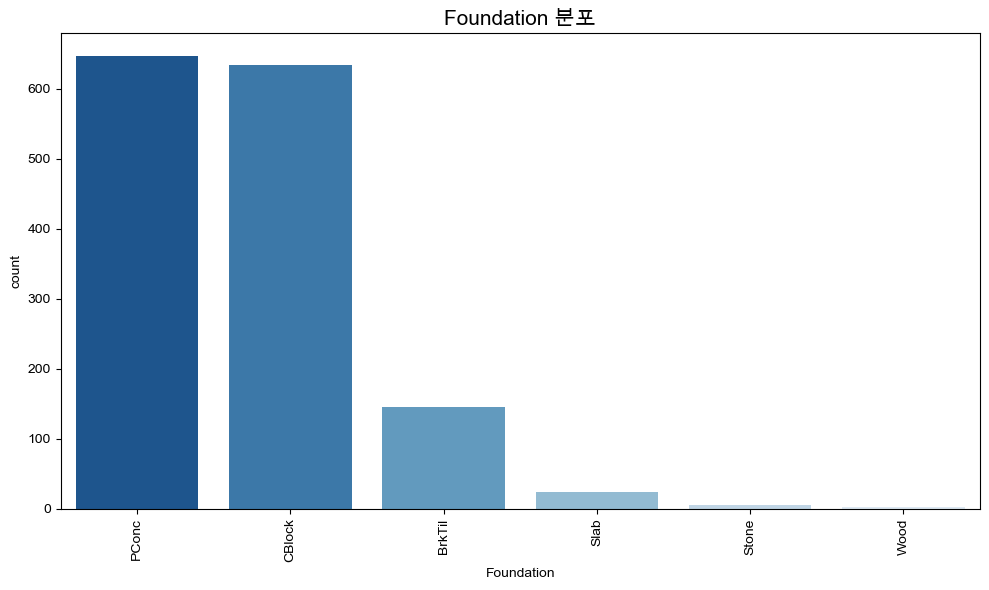

Electrical 고유값 개수: 6


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


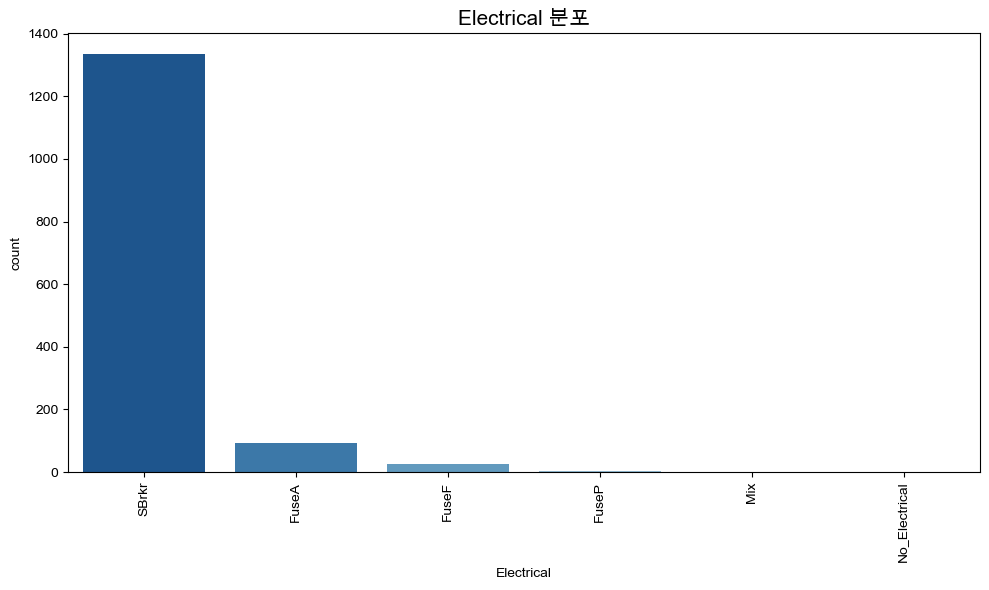

Heating 고유값 개수: 6


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


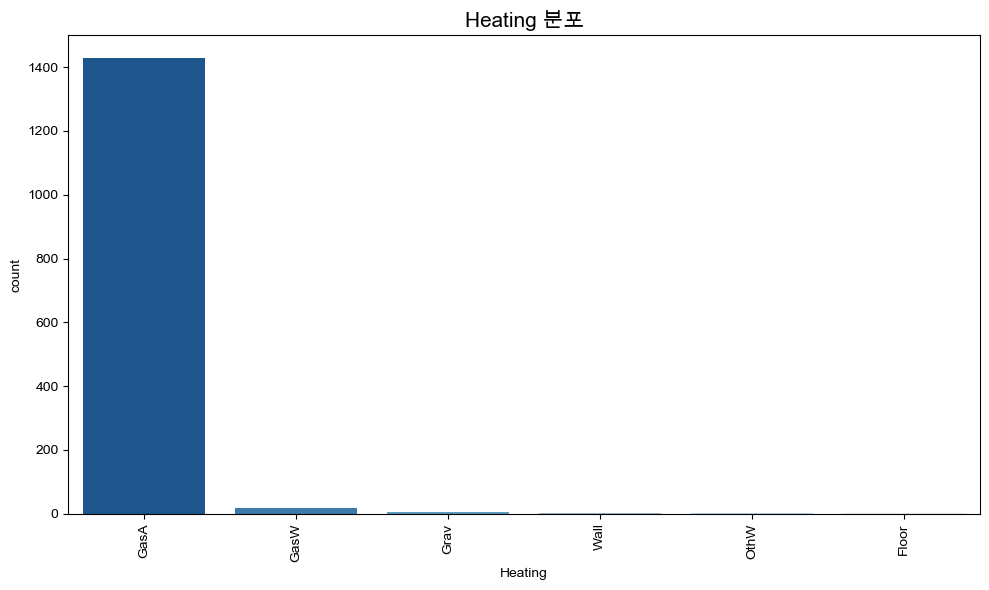

GarageCond 고유값 개수: 6


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


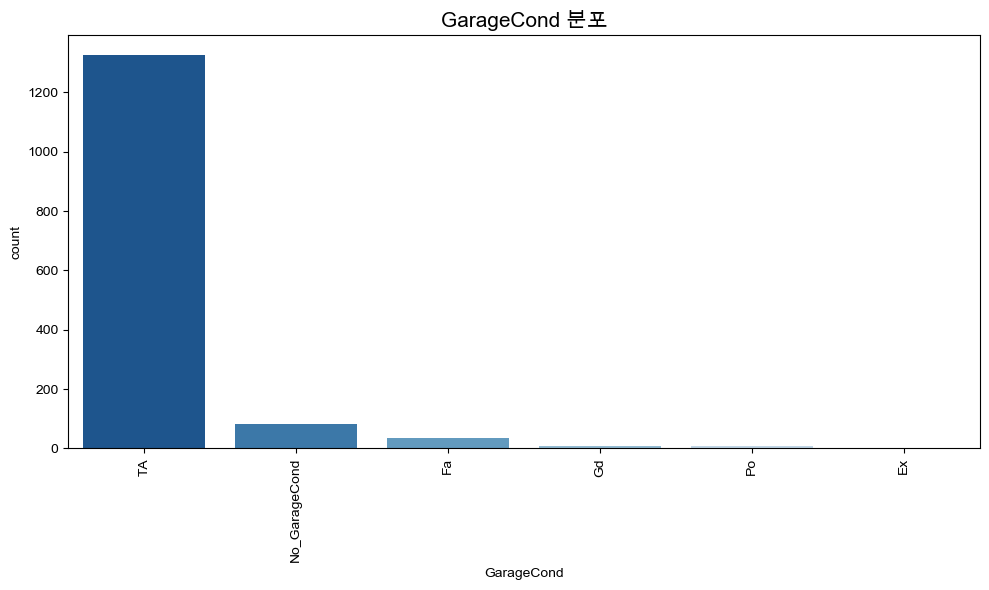

SaleCondition 고유값 개수: 6


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


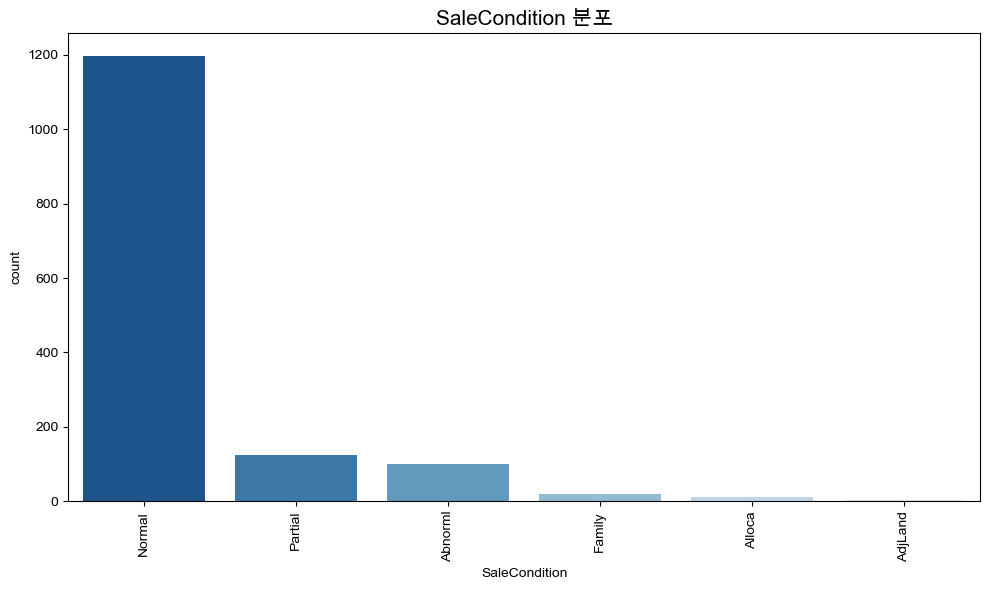

RoofStyle 고유값 개수: 6


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


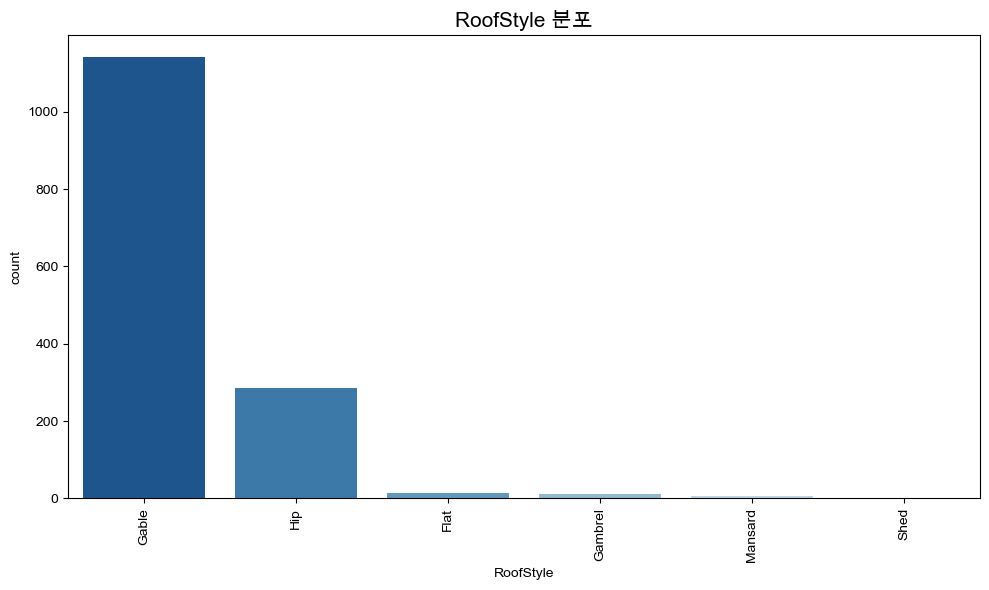

ExterCond 고유값 개수: 5


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


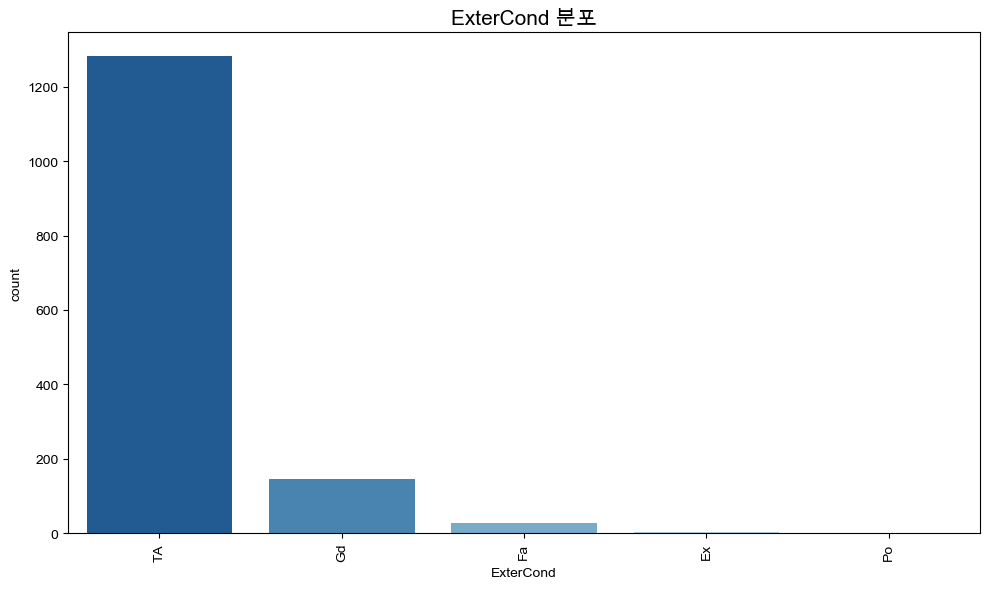

HeatingQC 고유값 개수: 5


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


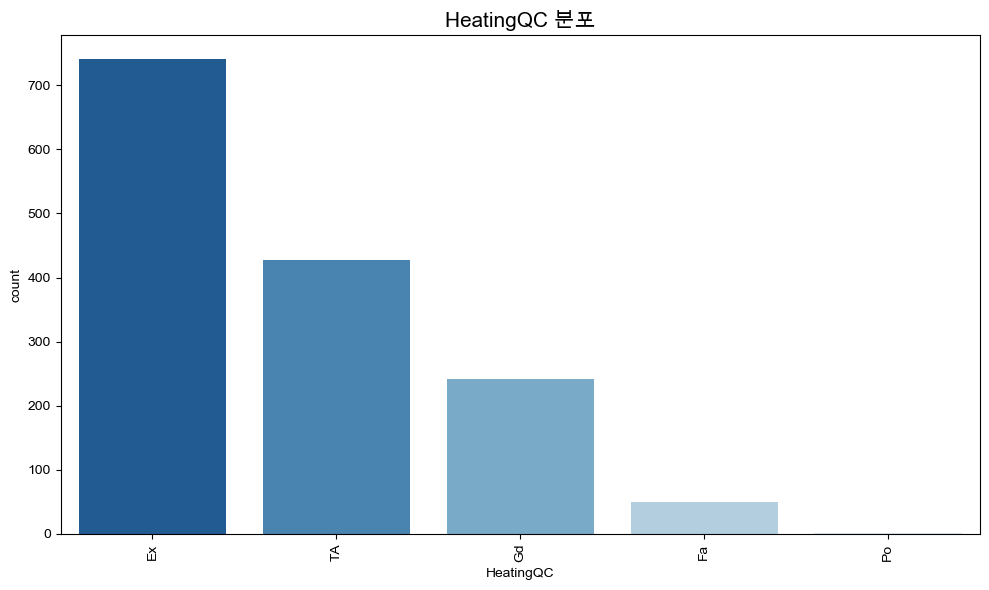

MiscFeature 고유값 개수: 5


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


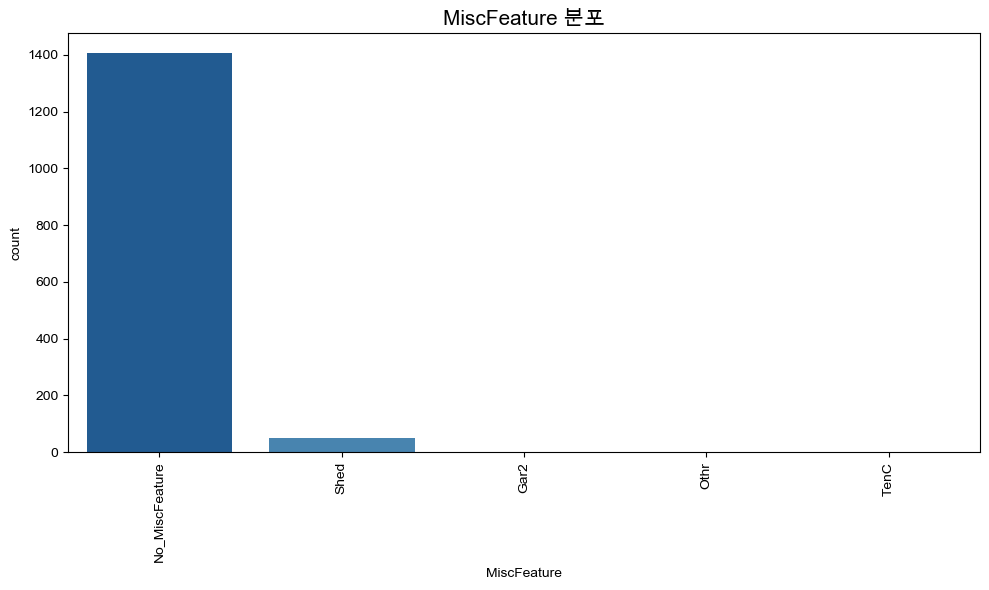

Fence 고유값 개수: 5


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


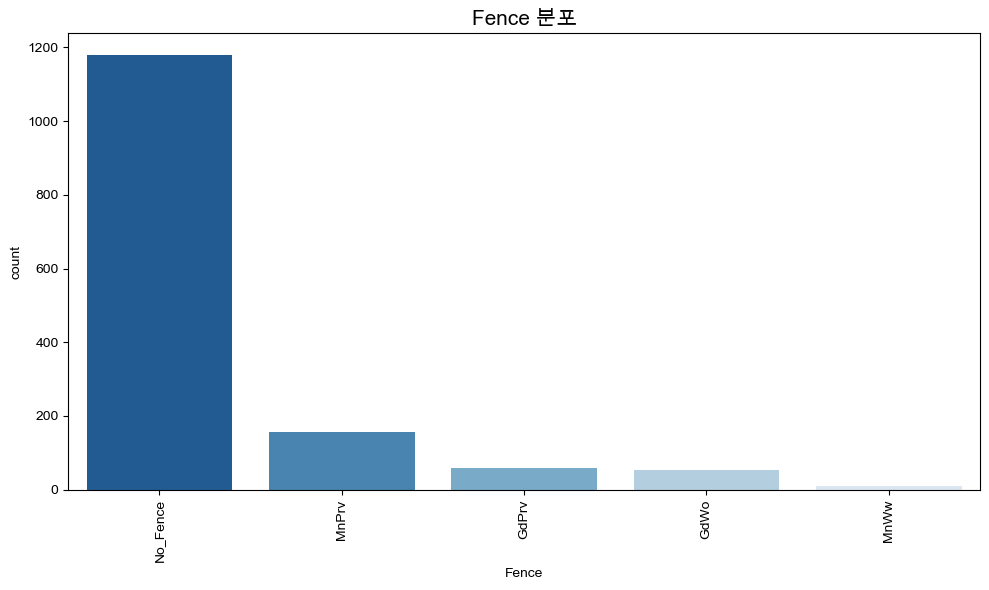

MSZoning 고유값 개수: 5


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


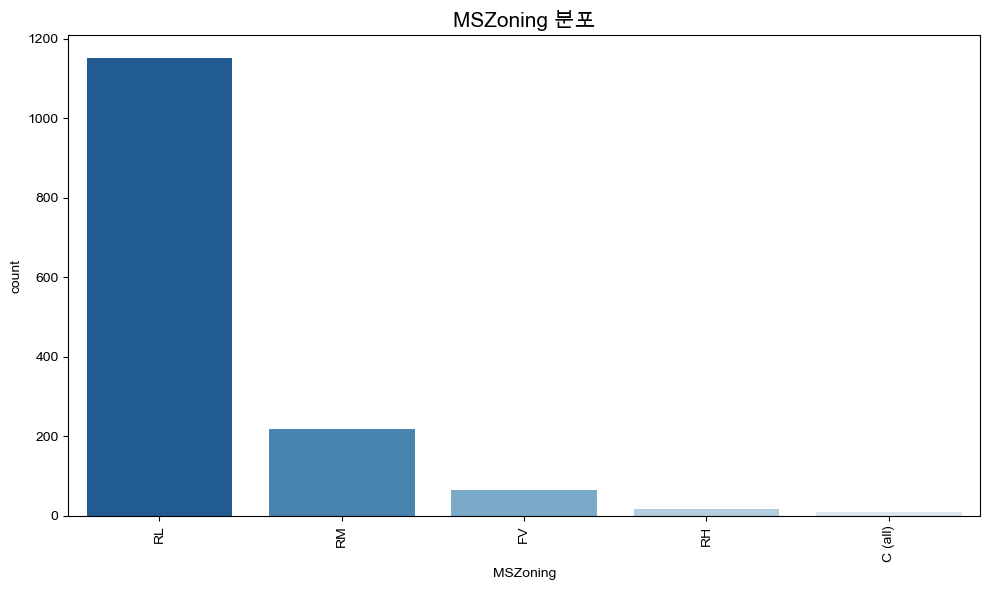

BldgType 고유값 개수: 5


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


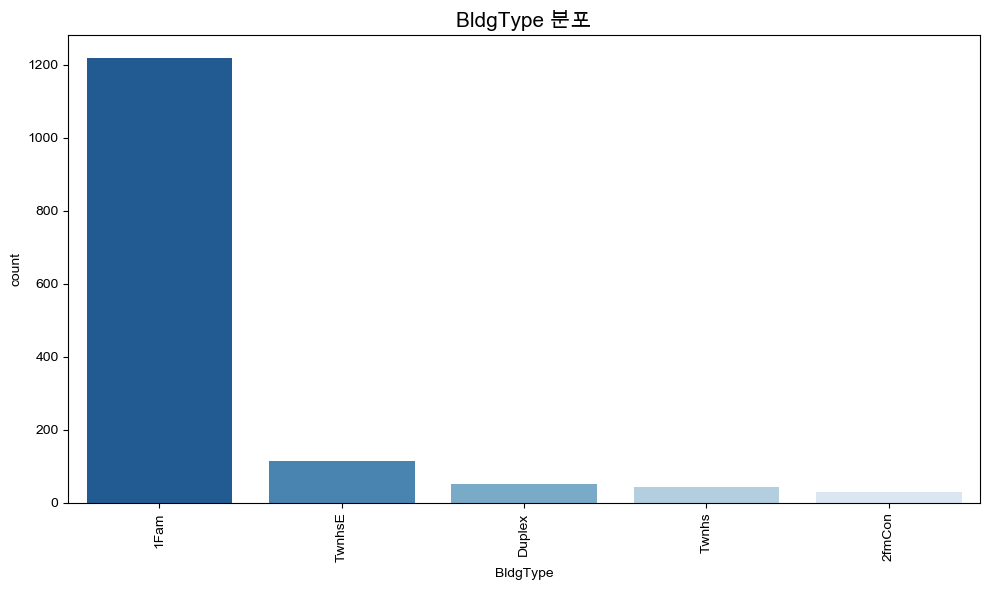

LotConfig 고유값 개수: 5


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


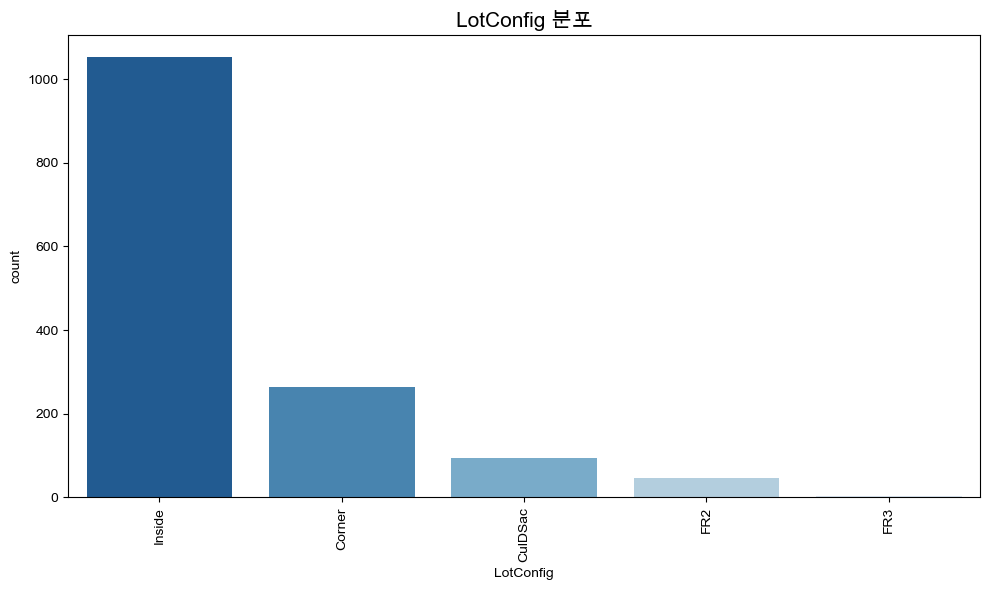

BsmtExposure 고유값 개수: 5


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


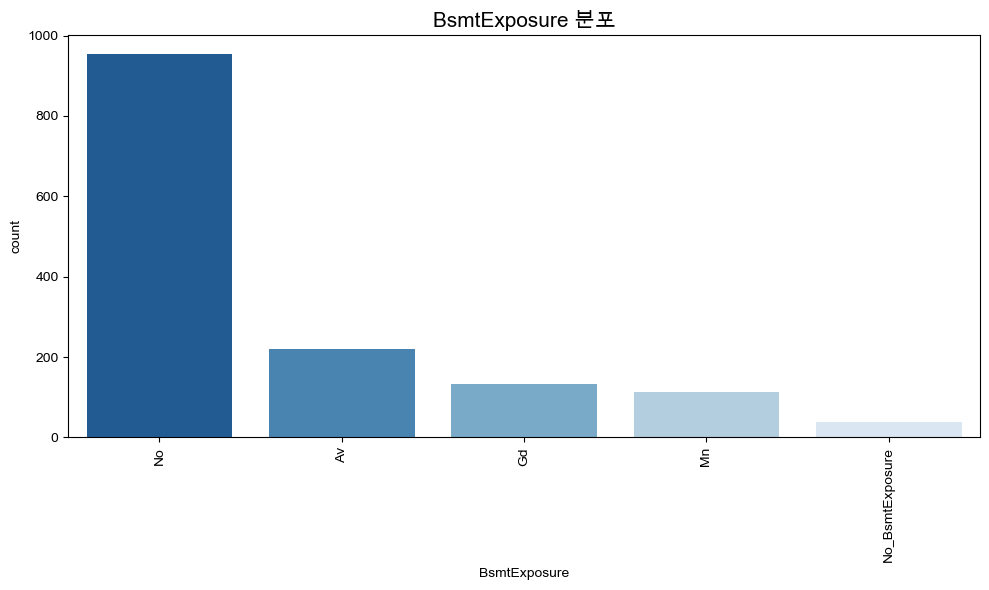

BsmtCond 고유값 개수: 5


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


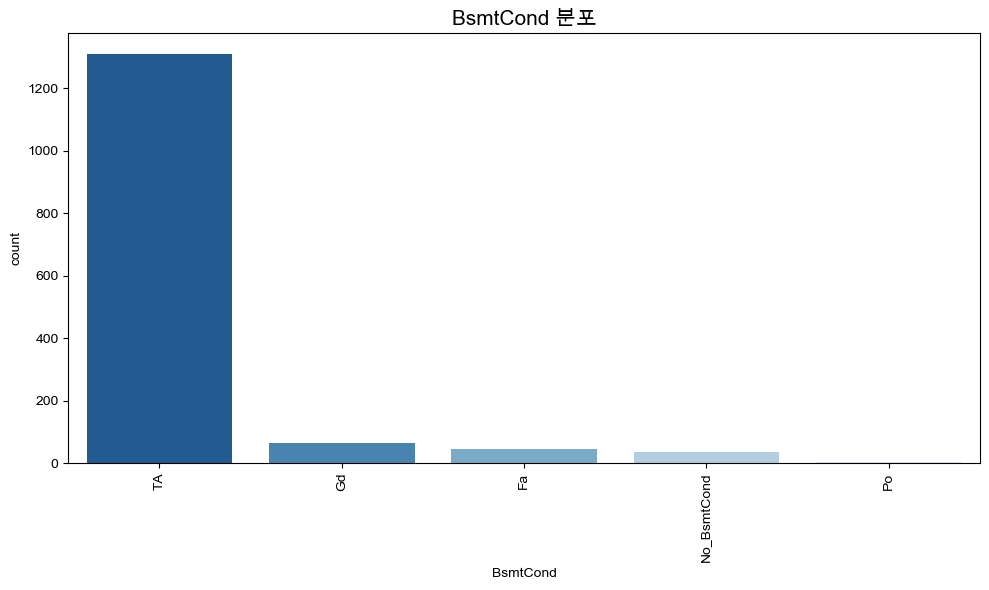

BsmtQual 고유값 개수: 5


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


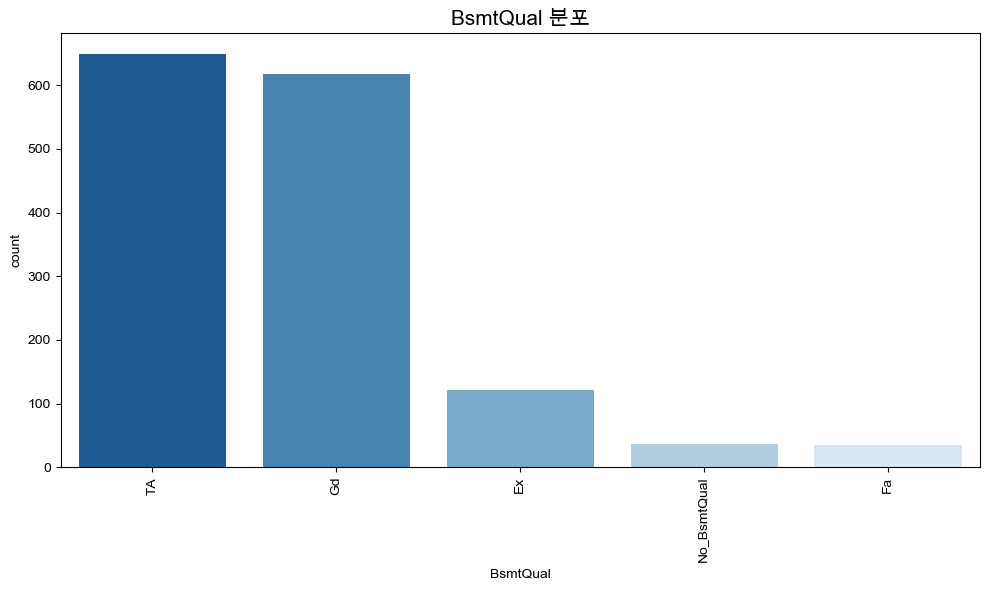

MasVnrType 고유값 개수: 4


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


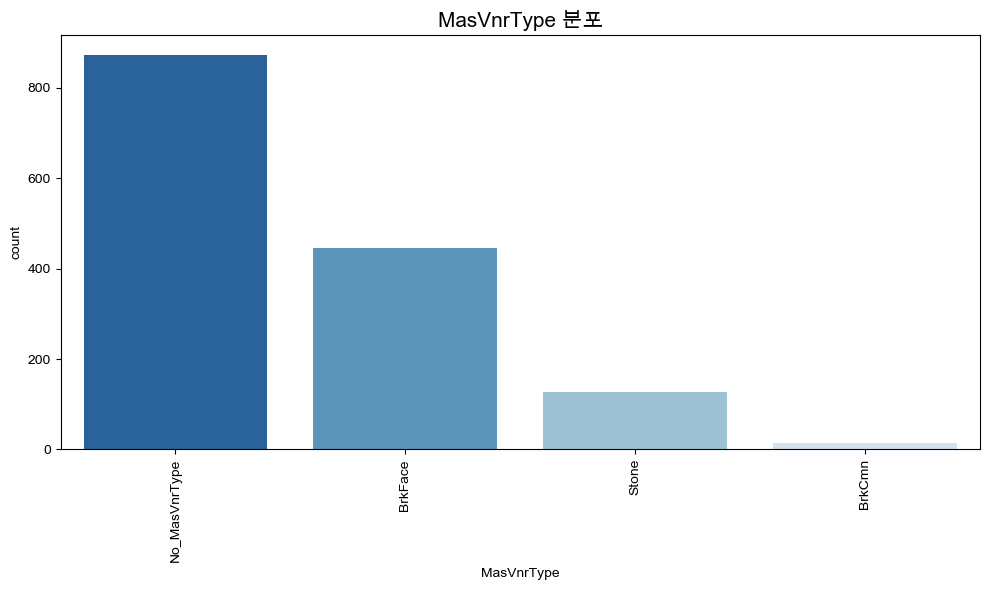

KitchenQual 고유값 개수: 4


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


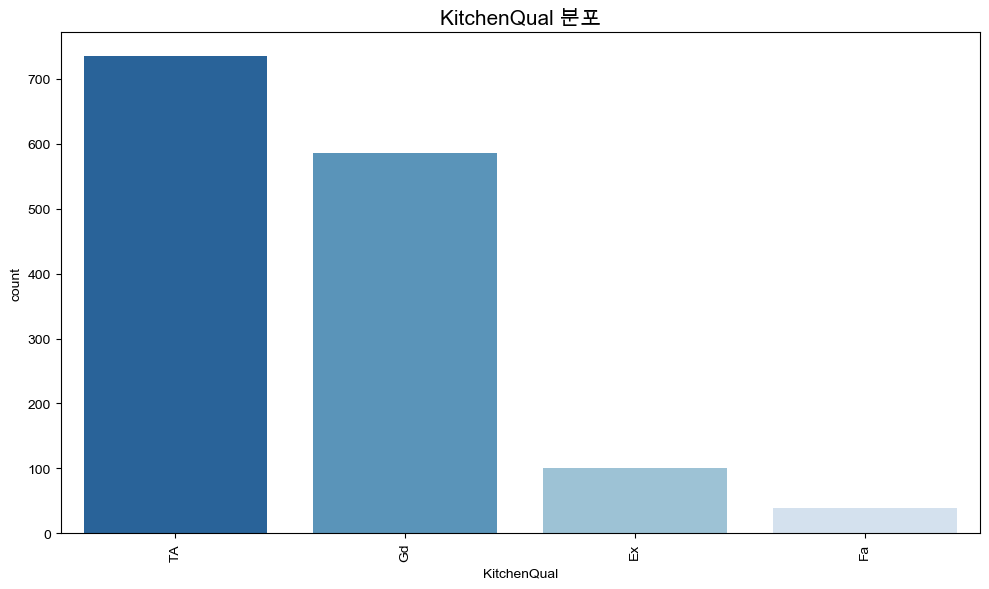

ExterQual 고유값 개수: 4


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


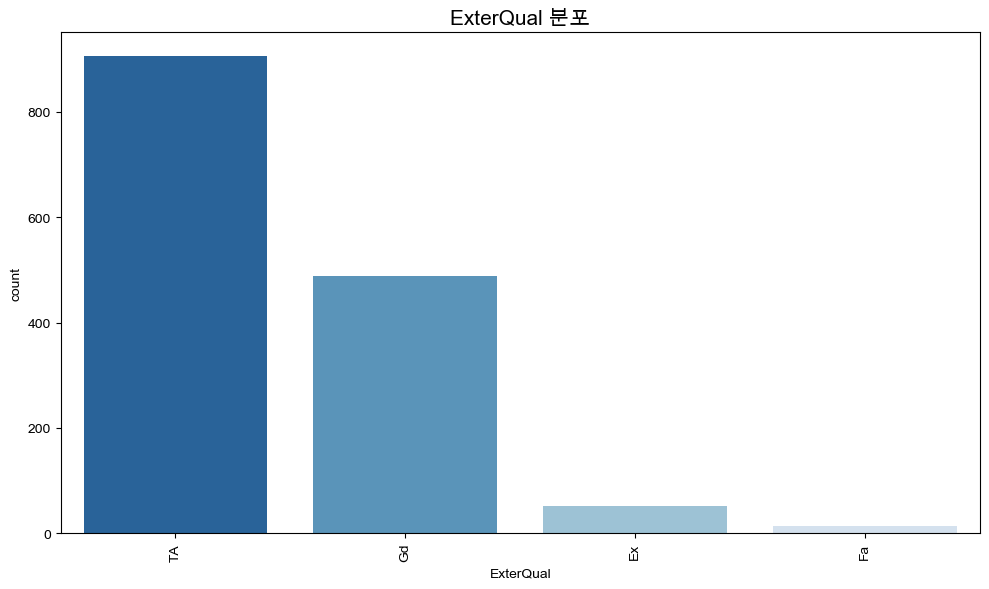

GarageFinish 고유값 개수: 4


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


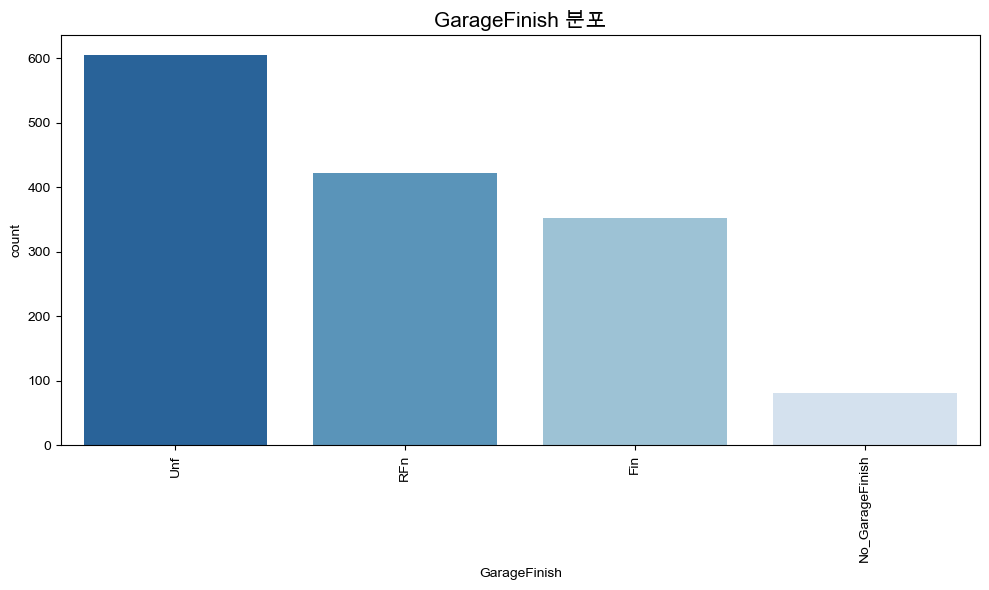

LandContour 고유값 개수: 4


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


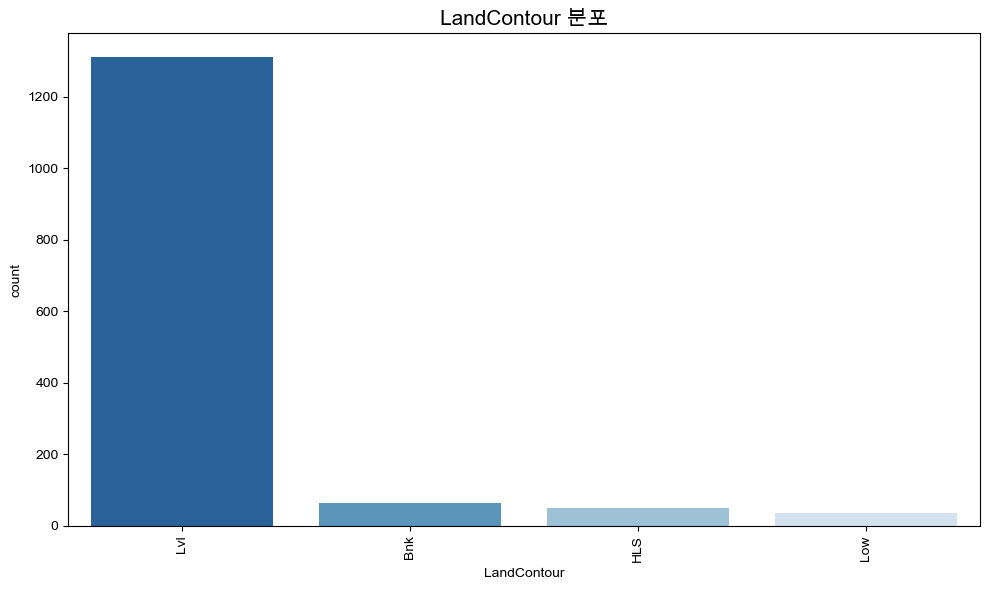

LotShape 고유값 개수: 4


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


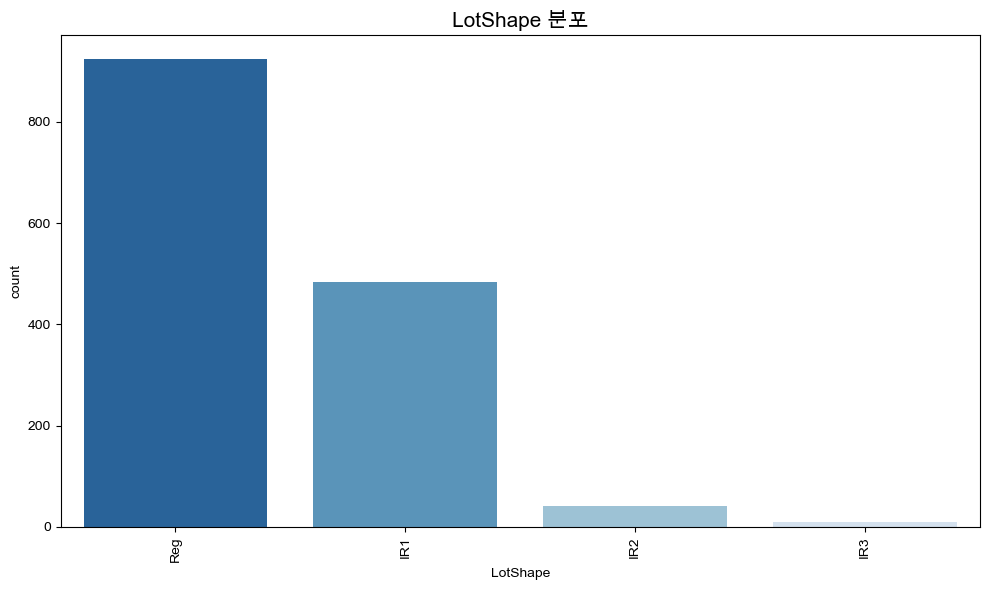

PoolQC 고유값 개수: 4


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


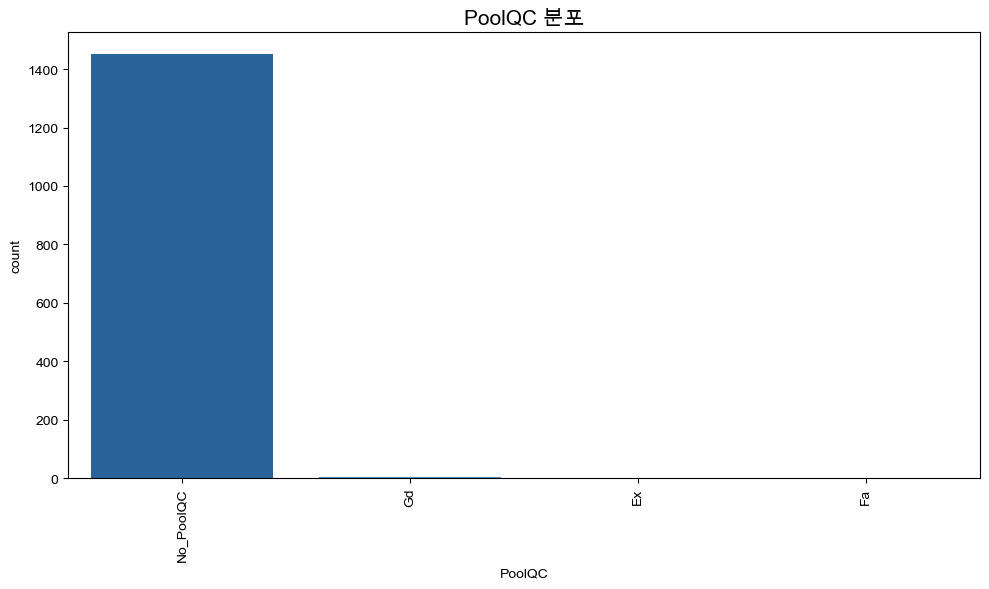

LandSlope 고유값 개수: 3


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


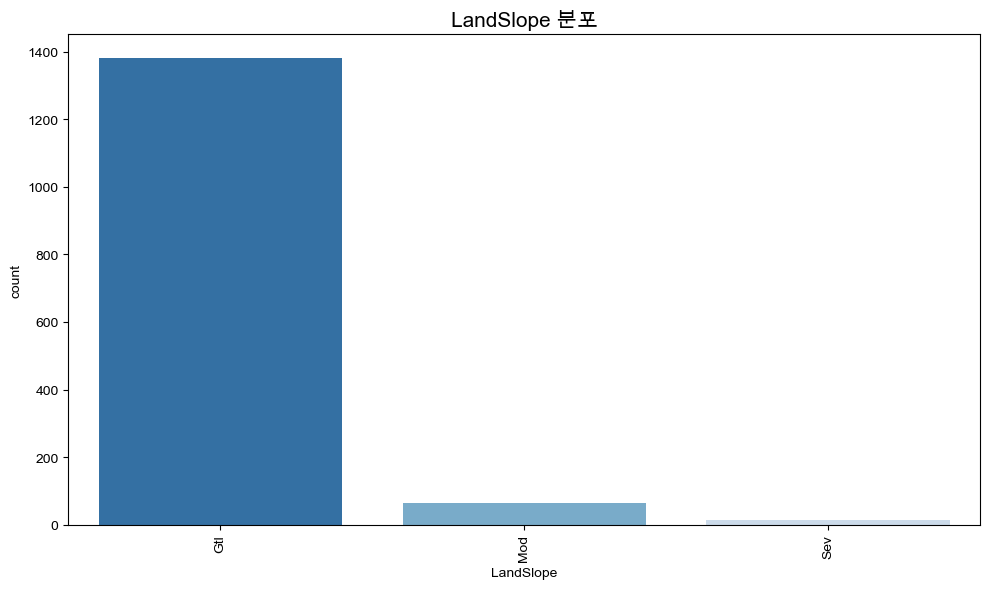

PavedDrive 고유값 개수: 3


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


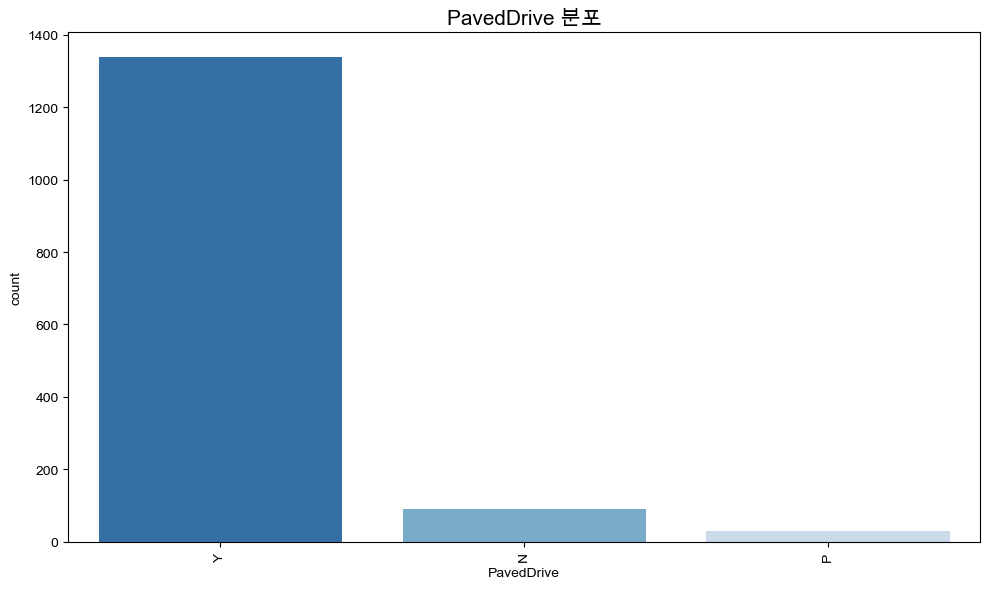

Alley 고유값 개수: 3


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


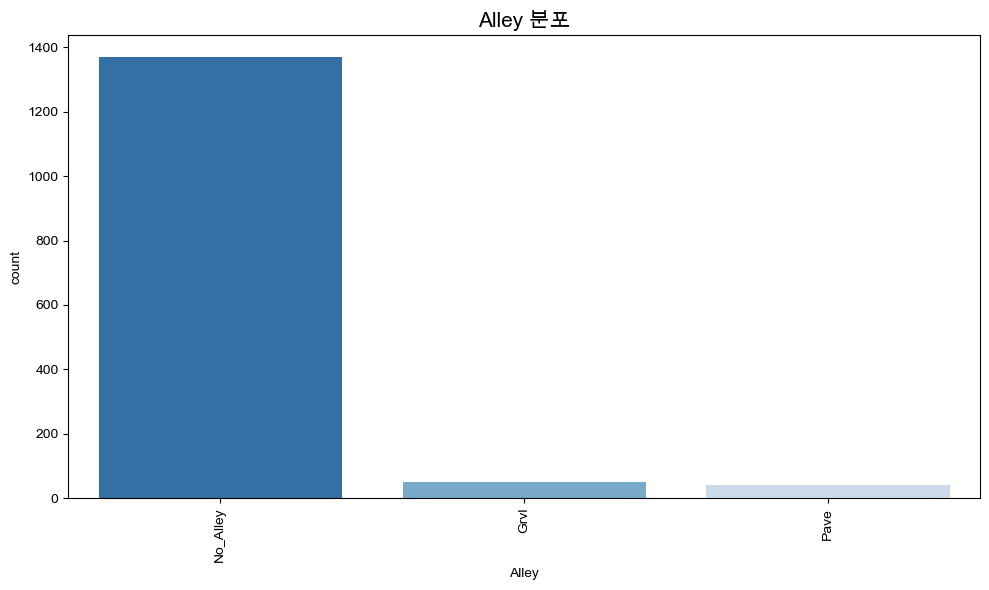

CentralAir 고유값 개수: 2


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


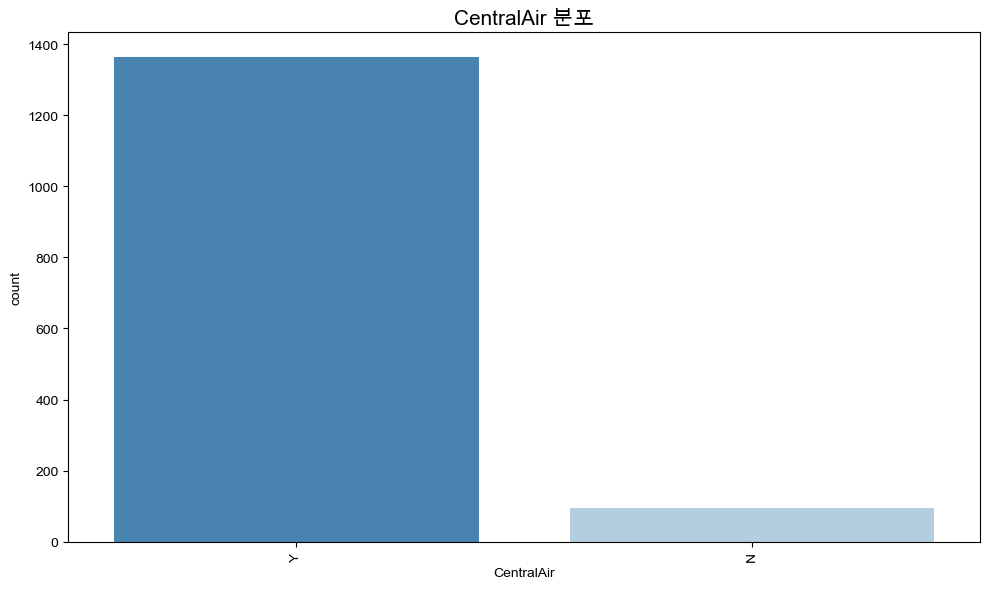

Utilities 고유값 개수: 2


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


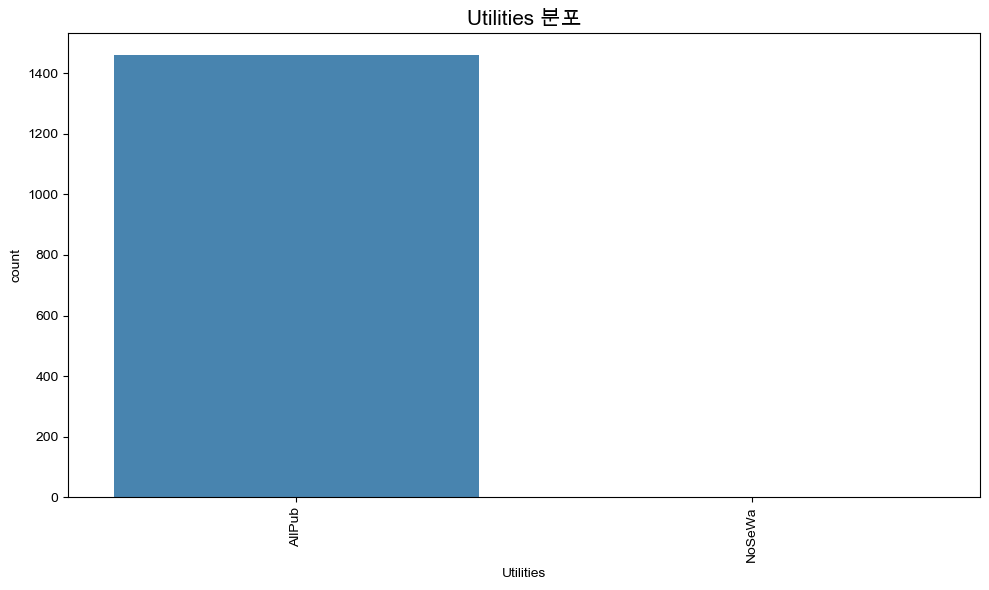

Street 고유값 개수: 2


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3889510431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sorted_data, palette='Blues_r')


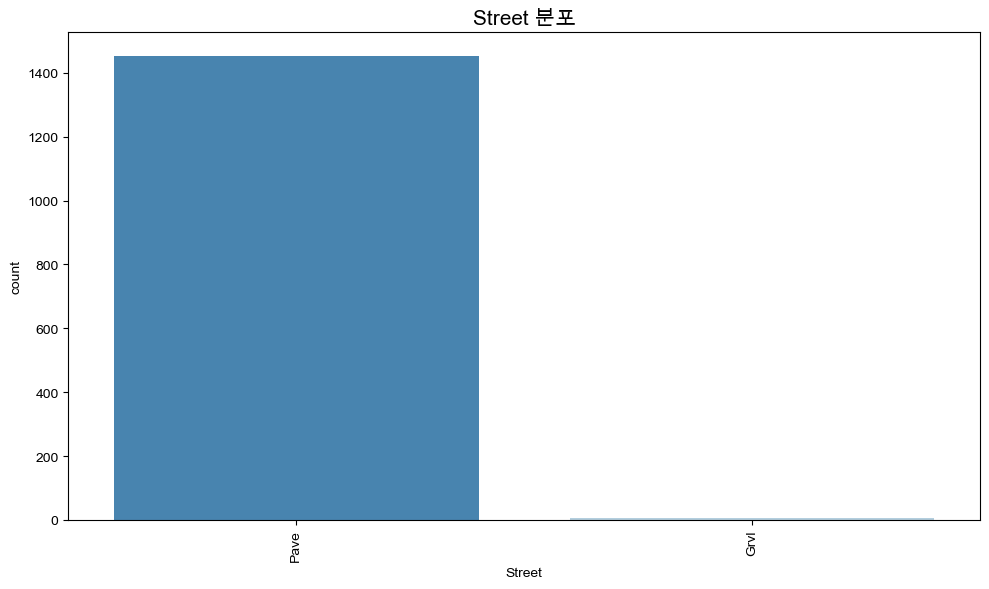

In [14]:
# 평균 이하 고유값을 가진 컬럼 시각화
for col in row_unique_cols:
    plt.figure(figsize=(10, 6))
    # 데이터 정렬
    value_counts = objects_df[col].value_counts()
    sorted_data = objects_df.copy()
    sorted_data[col] = pd.Categorical(sorted_data[col], categories=value_counts.index, ordered=True)
    print(f"{col} 고유값 개수: {len(value_counts)}")

    sns.countplot(x=col, data=sorted_data, palette='Blues_r')
    plt.title(f'{col} 분포', fontsize=15)
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

In [15]:
# 각 범주형 변수의 최빈값과 그 비율 확인
mode_analysis = pd.DataFrame(columns=['컬럼명', '최빈값', '비율(%)'])  # 컬럼명 명시적 추가
for col in objects_df.columns:
    mode_val = objects_df[col].mode()[0]
    mode_ratio = (objects_df[col] == mode_val).mean().round(4) * 100
    
    new_row = pd.DataFrame({
        '컬럼명': [col],
        '최빈값': [mode_val],
        '비율(%)': [mode_ratio]})
    mode_analysis = pd.concat([mode_analysis, new_row], ignore_index=True)

mode_analysis['고유값 개수'] = mode_analysis['컬럼명'].apply(lambda col: objects_df[col].nunique())
mode_analysis['고유값 상태'] = mode_analysis['컬럼명'].apply(
    lambda col: '평균 이상' if col in high_unique_cols.values else '평균 이하') # 고유값 평균 개수 : 6.53
mode_analysis.loc[mode_analysis['고유값 개수'] == 6, '고유값 상태'] = '평균'

mode_analysis = mode_analysis.sort_values(by='비율(%)', ascending=False).reset_index(drop=True)
mode_analysis

,컬럼명,최빈값,비율(%),고유값 개수,고유값 상태
0,Utilities,AllPub,99.93,2,평균 이하
1,Street,Pave,99.59,2,평균 이하
2,PoolQC,No_PoolQC,99.52,4,평균 이하
3,Condition2,Norm,98.97,8,평균 이상
4,RoofMatl,CompShg,98.22,8,평균 이상
5,Heating,GasA,97.81,6,평균
6,MiscFeature,No_MiscFeature,96.30,5,평균 이하
7,LandSlope,Gtl,94.66,3,평균 이하
8,Alley,No_Alley,93.77,3,평균 이하
9,CentralAir,Y,93.49,2,평균 이하


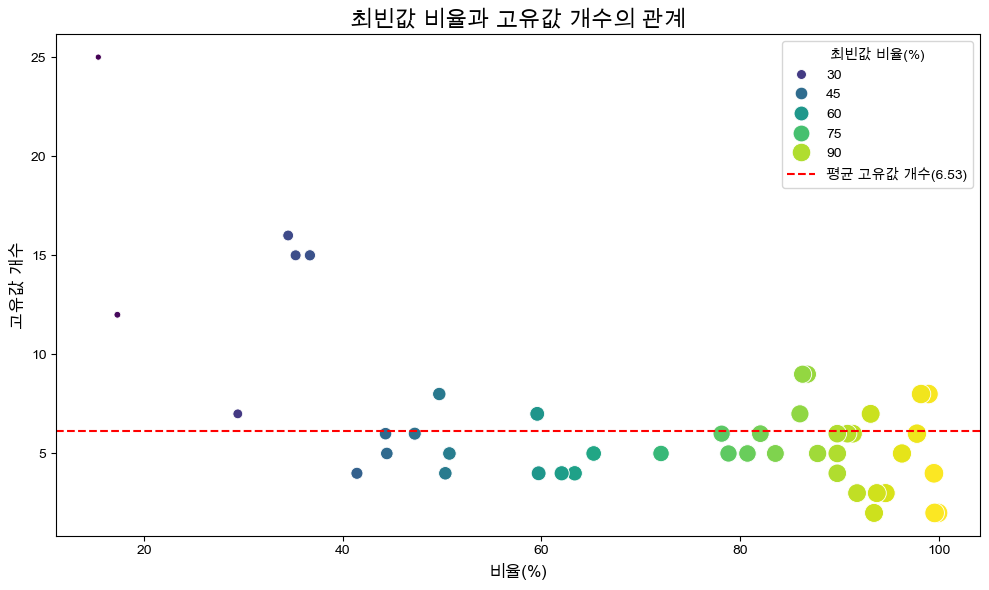

In [16]:
plt.figure(figsize=(10, 6))

# 산점도 시각화
sns.scatterplot(
    data=mode_analysis,
    x='비율(%)',
    y='고유값 개수',
    hue='비율(%)',  # 비율로 색상 구분
    palette='viridis',
    size='비율(%)',  # 비율로 점 크기 구분
    sizes=(20, 200),
    legend='brief')

plt.axhline(y=6.15, color='red', linestyle='--', linewidth=1.5, label='평균 고유값 개수(6.53)')
plt.title('최빈값 비율과 고유값 개수의 관계', fontsize=16)
plt.xlabel('비율(%)', fontsize=12)
plt.ylabel('고유값 개수', fontsize=12)
plt.legend(title='최빈값 비율(%)')
plt.tight_layout()
plt.show()

#### 2-3. 교차 분석
- 위 범주형 변수들을 시각화한 결과 'SaleType'(판매 유형) 과의 관계를 분석하는 것이 유의미한 결론을 도출할 것이라고 판단.
- SaleType은 주택 판매 유형으로 각 (현금, 거래, 보증 증서, 신축 주택 등)을 나타낸다.

  - 다음 주요 변수들과 `SaleType` 간의 교차분석을 수행
  - **BldgType × SaleType**: 건물 유형에 따른 판매 방식의 분포
  - **MoSold × SaleType**: 판매 월에 따른 판매 방식의 분포
  - **Neighborhood × SaleType**: 지역에 따른 판매 방식의 분포
  - **SaleCondition × SaleType**: 판매 조건에 따른 판매 방식의 분포

In [17]:
# 교차 분석
class CrossTabAnalysis:
    def __init__(self, df):
        self.df = df

    # 교차 분석 테이블 생성 함수
    def create_crosstab(self, index, columns):
        return pd.crosstab(index=self.df[index], columns=self.df[columns])
    
    # 카이제곱 검증 함수
    def chi2_test(self, crosstab):
        chi2, p, dof, _ = chi2_contingency(crosstab)
        print(f"카이제곱 통계량: {chi2:.2f}")
        print(f"p-value: {p:.4f}")
        print(f"자유도(Degrees of Freedom): {dof}")
        if p < 0.05:
            print("=> 결과: 유의미한 연관이 있습니다. (p < 0.05)")
        else:
            print("=> 결과: 유의미한 연관이 없습니다. (p >= 0.05)")

    # 교차 분석 결과 시각화 함수
    def visualize_crosstabs(self, crosstabs, titles, cmaps, figsize=(14, 10)):
        if len(crosstabs) != 4 or len(titles) != 4 or len(cmaps) != 4:
            raise ValueError("교차 분석 테이블, 제목, 색상 맵의 수는 각각 4개여야 합니다.")
        
        fig, axes = plt.subplots(2, 2, figsize=figsize)
        plt.subplots_adjust(hspace=0.4, wspace=0.4)

        for i, ax in enumerate(axes.flat):
            sns.heatmap(crosstabs[i], annot=True, fmt='d', cmap=cmaps[i], ax=ax)
            ax.set_title(titles[i], fontsize=14)
            ax.set_xlabel(titles[i].split('×')[1].strip(), fontsize=12)
            ax.set_ylabel(titles[i].split('×')[0].strip(), fontsize=12)
        plt.tight_layout()
        plt.show()

    # 위 함수 통합
    def analyze(self, index, columns):
        crosstab = self.create_crosstab(index, columns)
        chi2_results = self.chi2_test(crosstab)
        return crosstab, chi2_results 

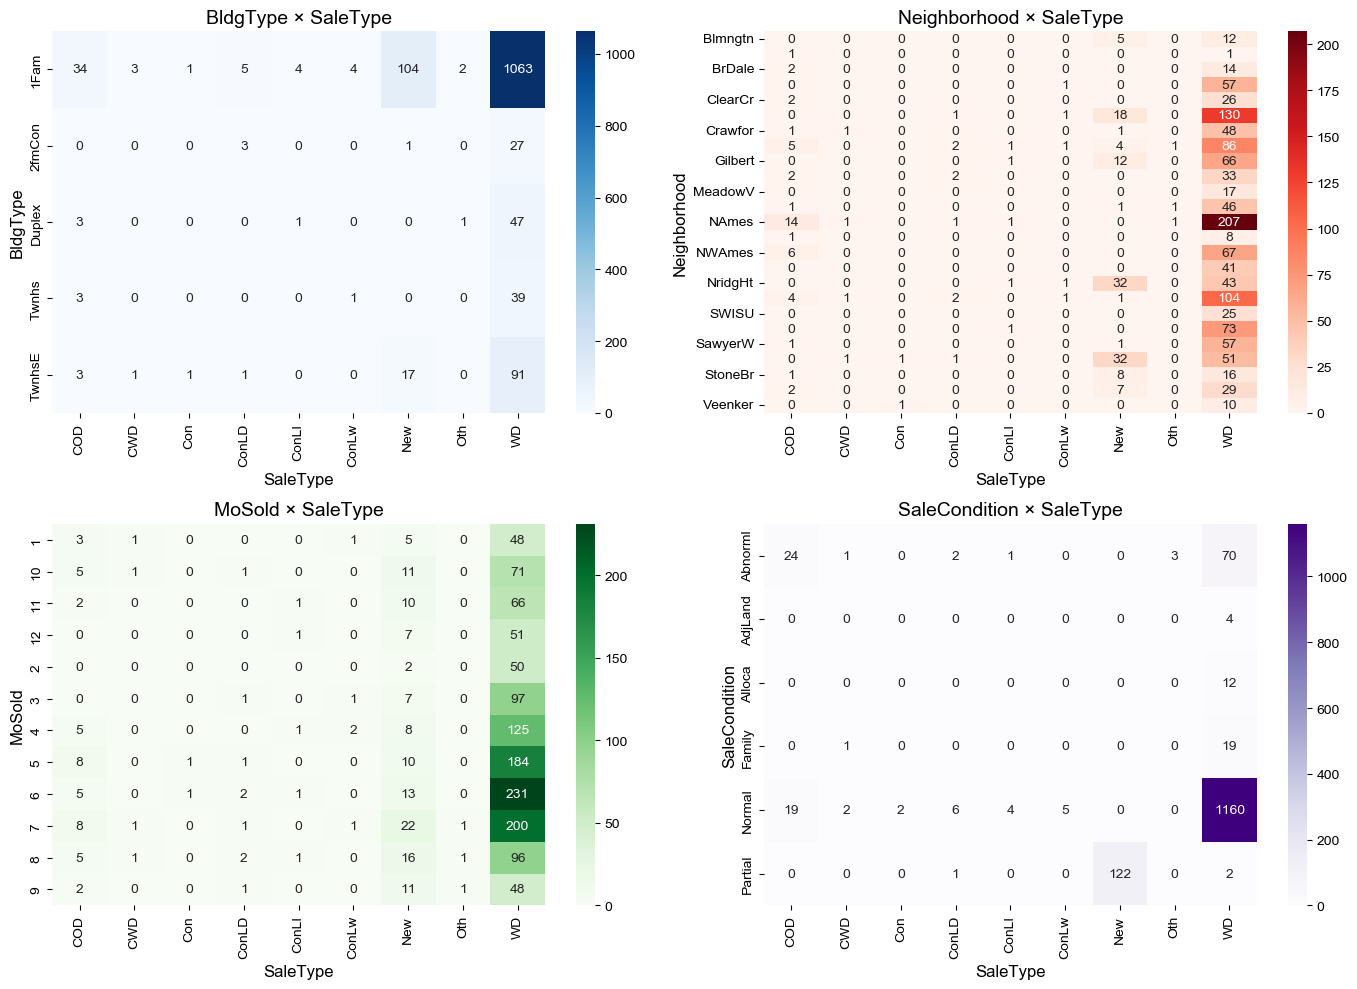

In [18]:
analysis = CrossTabAnalysis(objects_df)

# 교차 분석 테이블 생성
cross_bldgtype = analysis.create_crosstab('BldgType', 'SaleType')
cross_neighborhood = analysis.create_crosstab('Neighborhood', 'SaleType')
cross_mosold = analysis.create_crosstab('MoSold', 'SaleType')
cross_salecondition = analysis.create_crosstab('SaleCondition', 'SaleType')

# 교차 분석 테이블 리스트
crosstabs = [cross_bldgtype, cross_neighborhood, cross_mosold, cross_salecondition]
titles = [
    'BldgType × SaleType',
    'Neighborhood × SaleType',
    'MoSold × SaleType',
    'SaleCondition × SaleType']
cmaps = ['Blues', 'Reds', 'Greens', 'Purples']

# 시각화
analysis.visualize_crosstabs(crosstabs, titles, cmaps)

#### 2-4 카이제곱 검정(Chi-Square Test)
- 목적: 교차표에서 나온 결과를 통계적으로 유의미한지를 검정

    - 특정 건물 유형이 특정 거래 방식에 선호되는가?
    - 특정 시기(판매 월)에 거래 방식이 집중되는가?
    - 특정 지역에서 신축 주택 판매나 특수 거래 방식이 두드러지는가?
    - 판매 조건(정상, 비정상)에 따라 거래 방식의 차이가 존재하는가?

In [19]:
test_data = [cross_bldgtype, cross_mosold, cross_neighborhood, cross_neighborhood]

for idx, crosstab in enumerate(test_data):
    print(f"교차 테이블 {idx + 1}에 대한 결과:")
    analysis.chi2_test(crosstab)
    print("-" * 50)  

교차 테이블 1에 대한 결과:
카이제곱 통계량: 88.22
p-value: 0.0000
자유도(Degrees of Freedom): 32
=> 결과: 유의미한 연관이 있습니다. (p < 0.05)
--------------------------------------------------
교차 테이블 2에 대한 결과:
카이제곱 통계량: 93.37
p-value: 0.3276
자유도(Degrees of Freedom): 88
=> 결과: 유의미한 연관이 없습니다. (p >= 0.05)
--------------------------------------------------
교차 테이블 3에 대한 결과:
카이제곱 통계량: 525.71
p-value: 0.0000
자유도(Degrees of Freedom): 192
=> 결과: 유의미한 연관이 있습니다. (p < 0.05)
--------------------------------------------------
교차 테이블 4에 대한 결과:
카이제곱 통계량: 525.71
p-value: 0.0000
자유도(Degrees of Freedom): 192
=> 결과: 유의미한 연관이 있습니다. (p < 0.05)
--------------------------------------------------


#### 결론
1. BldgType × SaleType
    - p-value: 0.0000
    - 특정 건물 유형(1Fam)은 특정 거래 유형(WD)에 집중되는 경향을 보임

2. MoSold × SaleType
    - p-value: 0.3276
    - 판매 월에 따라 거래 유형이 특별히 집중되는 경향은 보이지 않음

3. Neighborhood × SaleType
    - p-value: 0.0000
    - 특정 지역(예: NAmes, CollgCr)에서는 특정 거래 유형(WD)에 거래가 집중되는 경향이 나타남

4. SaleCondition × SaleType
    - p-value: 0.0000
    - 정상 거래(Normal)는 주로 WD 거래 유형에 집중되었고, 비정상 거래(Partial, Abnorml)도 특정 유형과 관련이 있다.

----------------------

#### 2-5. 변수 간 상관성 분석
- ANOVA 분석을 위해 타겟컬럼에 대한 정규성 검정 및 범주형 변수들과 등분산성 검정
- SalePrice 와 범주형 변수 간 상관성 분석
- YearRemodAdd 와 범주형 변수 간 상관성 분석 

In [20]:
# 원래 데이터 타입으로 변경
df['MSSubClass'] = df['MSSubClass'].astype('str') 
df['MoSold'] = df['MoSold'].astype('int') # 원래 데이터 타입으로 변경
objects_df = objects_df.drop(columns=['MoSold'])

data_type_check(df) # 확인

Str dtypes: 44개
Num dtypes: 36개


귀무가설 기각: 'SalePrice'는 정규 분포를 따르지 않는다. (p-value: 0.0000)


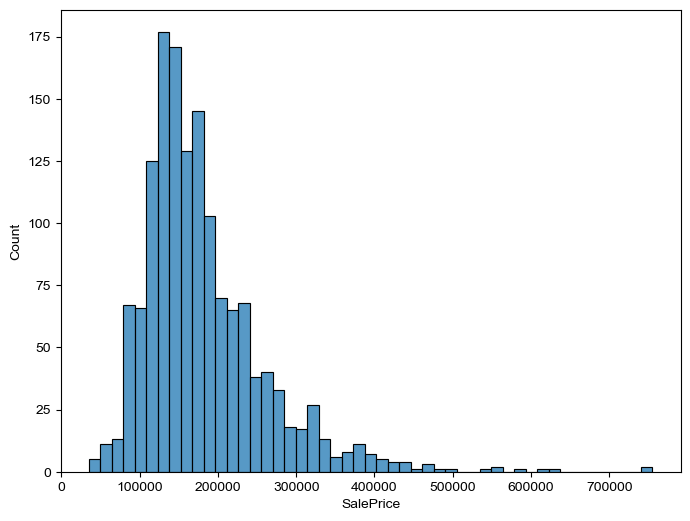

In [21]:
# 타겟 컬럼인 'SalePrice'의 대한 정규성 검정
stat, p = shapiro(df['SalePrice'])  # Shapiro-Wilk 테스트
if p > 0.05:
    print(f"귀무가설을 기각 불가: 'SalePrice'는 정규 분포를 따른다. (p-value: {p:.4f})")
else:
    print(f"귀무가설 기각: 'SalePrice'는 정규 분포를 따르지 않는다. (p-value: {p:.4f})")

plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'])
plt.show()

In [22]:
# 등분산성 검정
objects_df_copy = objects_df.copy()
objects_df_copy['SalePrice'] = df['SalePrice']
results = []

for col in objects_df:
    # Grouping
    grouped_data = [objects_df_copy['SalePrice'][objects_df_copy[col] == level] for level in objects_df_copy[col].unique()]
    
    # 등분산성 검정
    stat_levene, p_levene = levene(*grouped_data)
    if p_levene < 0.05:
        levene_result = "등분산성 불만족"
    else:
        levene_result = "등분산성 만족"
    
    results.append({
        'Variable': col,
        'Levene p-value': p_levene,
        'Levene Result': levene_result,})

levene_df = pd.DataFrame(results)
levene_df['Levene Result Count'] = levene_df['Levene Result'].map(levene_df['Levene Result'].value_counts())
levene_df = levene_df.sort_values(by=['Levene Result Count', 'Levene p-value'], ascending=[False, True]).drop(columns='Levene Result Count')
levene_df = levene_df.reset_index(drop=True)

no_leven = levene_df[levene_df['Levene Result'] == '등분산성 불만족']
yes_leven = levene_df[levene_df['Levene Result'] == '등분산성 만족']

print(f"등분산성 만족 수: {len(yes_leven)}")
print(f"등분산성 불만족 수: {len(no_leven)}")

levene_df

등분산성 만족 수: 8
등분산성 불만족 수: 36


,Variable,Levene p-value,Levene Result
0,KitchenQual,1.279288e-45,등분산성 불만족
1,Neighborhood,3.362249e-43,등분산성 불만족
2,BsmtQual,2.541460e-36,등분산성 불만족
3,FireplaceQu,2.937041e-34,등분산성 불만족
4,ExterQual,1.012596e-31,등분산성 불만족
5,GarageFinish,4.124459e-31,등분산성 불만족
6,BsmtFinType1,3.461791e-23,등분산성 불만족
7,BsmtExposure,1.437090e-22,등분산성 불만족
8,GarageType,3.275544e-22,등분산성 불만족
9,HeatingQC,1.294766e-20,등분산성 불만족


- 위 'SalePrice' 의 정규성 검정 결과 정규분포를 따르지 않는다.
- 또한 등분산성 검정 또한 대부분의 변수가 등분산성 불만족을 하고있다.
- 해서 ANOVA 분석, F검정이 아닌 H검정을 사용(Kruskal-Wallis H-test)해서 범주형 변수와 타겟 변수의 관계 분석

In [23]:
def analyze_relationships(df, target_column):
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    kruskal_results = []

    for col in categorical_cols:
        grouped_data = [df[target_column][df[col] == category] for category in df[col].unique()]

        # Kruskal-Wallis H-Test
        stat, p_value = kruskal(*grouped_data)
        kruskal_results.append({'Column': col, 'Kruskal-Wallis Statistic': stat, 'p-value': p_value})

    results_df = pd.DataFrame(kruskal_results)
    results_df = results_df.sort_values(by='p-value', ascending=True).reset_index(drop=True)

    # p-value 기준 변수 분리
    significant_results = results_df[results_df['p-value'] < 0.05]
    non_significant_results = results_df[results_df['p-value'] >= 0.05]

    print(f"유의미한 변수 개수 (p-value < 0.05): {len(significant_results)}")
    print(f"유의미하지 않은 변수 개수 (p-value >= 0.05): {len(non_significant_results)}")
    
    if not non_significant_results.empty:
        print(f"유의미하지 않은 변수들: {non_significant_results['Column'].tolist()}")

    return results_df, non_significant_results

In [24]:
# SalePrice 관계 분석
objects_df_copy = objects_df.copy()
objects_df_copy['SalePrice'] = df['SalePrice']

object_result, no_h_test = analyze_relationships(objects_df_copy, 'SalePrice')
no_h_test

유의미한 변수 개수 (p-value < 0.05): 40
유의미하지 않은 변수 개수 (p-value >= 0.05): 4
유의미하지 않은 변수들: ['Street', 'PoolQC', 'LandSlope', 'Utilities']


,Column,Kruskal-Wallis Statistic,p-value
40,Street,3.062353,0.080126
41,PoolQC,5.995693,0.111820
42,LandSlope,3.938837,0.139538
43,Utilities,0.407369,0.523308


In [25]:
# YearRemodAdd 관계 분석
objects_df_copy2 = objects_df.copy()
objects_df_copy2['YearRemodAdd'] = df['YearRemodAdd']

object_result_2, no_h_test_2 = analyze_relationships(objects_df_copy2, 'YearRemodAdd')
no_h_test_2

유의미한 변수 개수 (p-value < 0.05): 39
유의미하지 않은 변수 개수 (p-value >= 0.05): 5
유의미하지 않은 변수들: ['Condition2', 'Utilities', 'RoofMatl', 'RoofStyle', 'PoolQC']


,Column,Kruskal-Wallis Statistic,p-value
39,Condition2,10.692483,0.152607
40,Utilities,1.319617,0.250661
41,RoofMatl,8.988725,0.253467
42,RoofStyle,3.929749,0.559574
43,PoolQC,0.027012,0.998829


In [26]:
# 유의미하지 않는 변수들 병합
NO_H_test = pd.concat([no_h_test, no_h_test_2], axis=0).drop_duplicates(subset=['Column']).reset_index(drop=True)
NO_H_test

,Column,Kruskal-Wallis Statistic,p-value
0,Street,3.062353,0.080126
1,PoolQC,5.995693,0.111820
2,LandSlope,3.938837,0.139538
3,Utilities,0.407369,0.523308
4,Condition2,10.692483,0.152607
5,RoofMatl,8.988725,0.253467
6,RoofStyle,3.929749,0.559574


### 3. 수치형 데이터 분석

#### 3-1. 기초 통계

In [27]:
num_df = df.select_dtypes(include=['float', 'int'])

statistics = num_df.describe().T # 기초 통계 확인, T = Transpose 약자(행, 열 전환)
statistics['IQR'] = statistics['75%'] - statistics['25%']  # IQR 추가(이상치 추가)
statistics

,count,mean,std,min,25%,50%,75%,max,IQR
LotFrontage,1460.0,68.267123,22.356355,21.0,60.00,63.0,79.00,313.0,19.00
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,4048.00
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,2.00
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,1.00
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,46.00
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,37.00
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0,164.25
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,712.25
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,0.00
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0,585.00


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3503298078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sort_std['Columns'], y=sort_std['std'], palette='coolwarm')


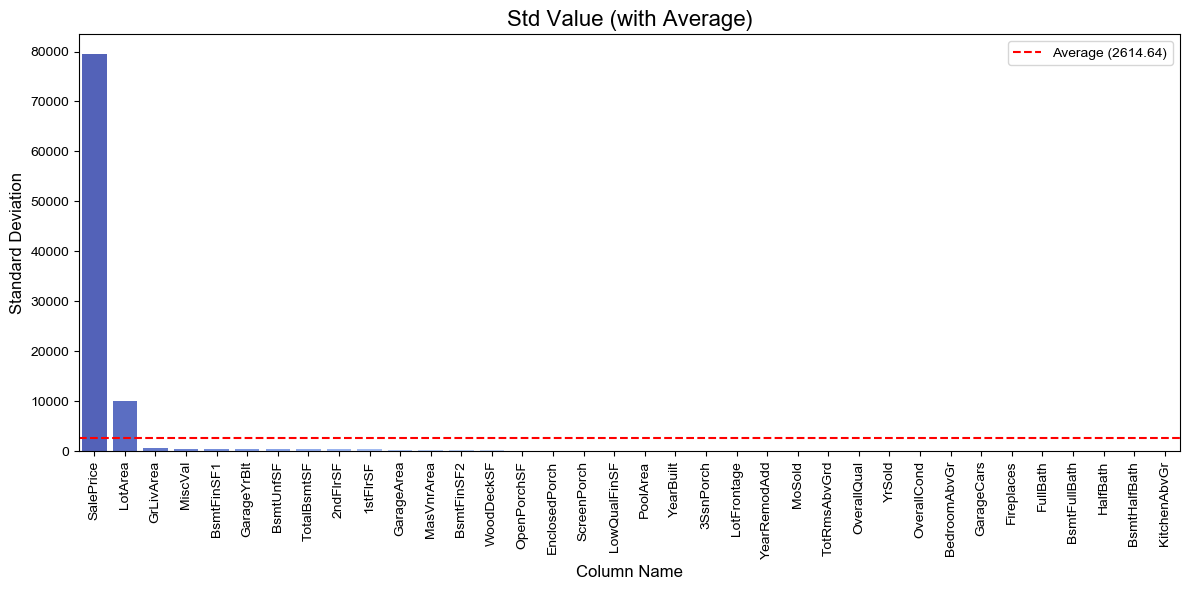

표준편차 평균: 2614.64


In [28]:
sort_std = statistics.sort_values(by=['std'], ascending=False).reset_index()
sort_std.rename(columns={'index': 'Columns'}, inplace=True)
std_mean = statistics['std'].mean()

# 표준 편차 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=sort_std['Columns'], y=sort_std['std'], palette='coolwarm')
plt.axhline(std_mean, color='red', linestyle='--', label=f'Average ({std_mean:.2f})')  # 평균선 추가
plt.title('Std Value (with Average)', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Standard Deviation', fontsize=12)
plt.xlabel('Column Name', fontsize=12)
plt.legend()  # 범례 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()

print(f"표준편차 평균: {std_mean:.2f}")

IQR 평균: 2571.11


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/659236548.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sort_iqr_stat['Columns'], y='IQR', data=sort_iqr_stat, palette='Blues_r')


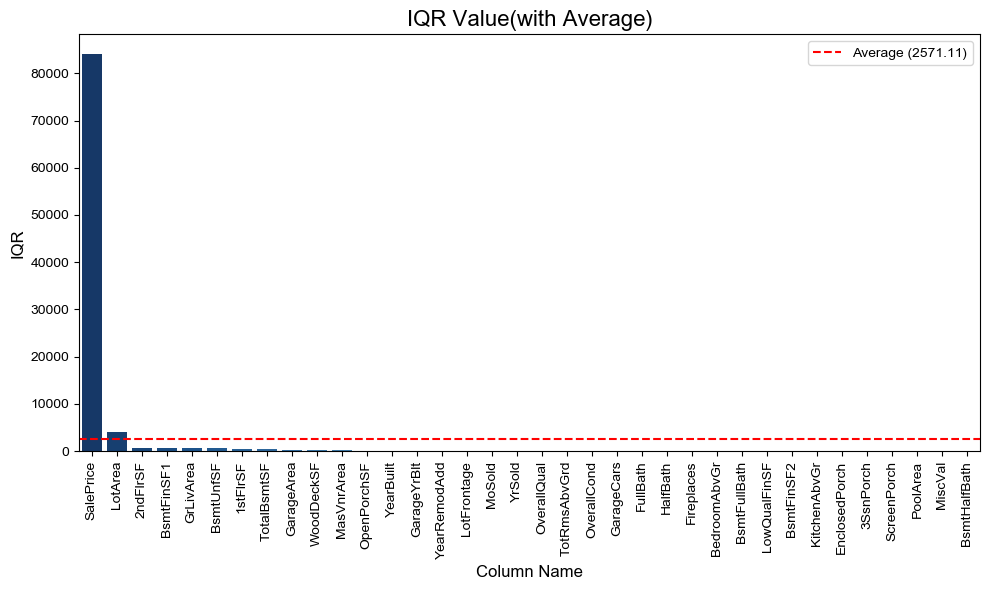

In [29]:
# 전체 이상치 시각화
sort_iqr_stat = statistics.sort_values(by=['IQR'], ascending=False).reset_index()
sort_iqr_stat.rename(columns={'index': 'Columns'}, inplace=True) 
average_iqr = statistics['IQR'].mean().round(2) # 전체 이상치 평균
print(f"IQR 평균: {average_iqr}")

plt.figure(figsize=(10, 6))
sns.barplot(x=sort_iqr_stat['Columns'], y='IQR', data=sort_iqr_stat, palette='Blues_r')
plt.axhline(average_iqr, color='red', linestyle='--', label=f'Average ({average_iqr})') # 평균선
plt.title('IQR Value(with Average)', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  
plt.ylabel('IQR', fontsize=12)
plt.xlabel('Column Name', fontsize=12)
plt.legend()  # 범례
plt.tight_layout()  # 레이아웃
plt.show()

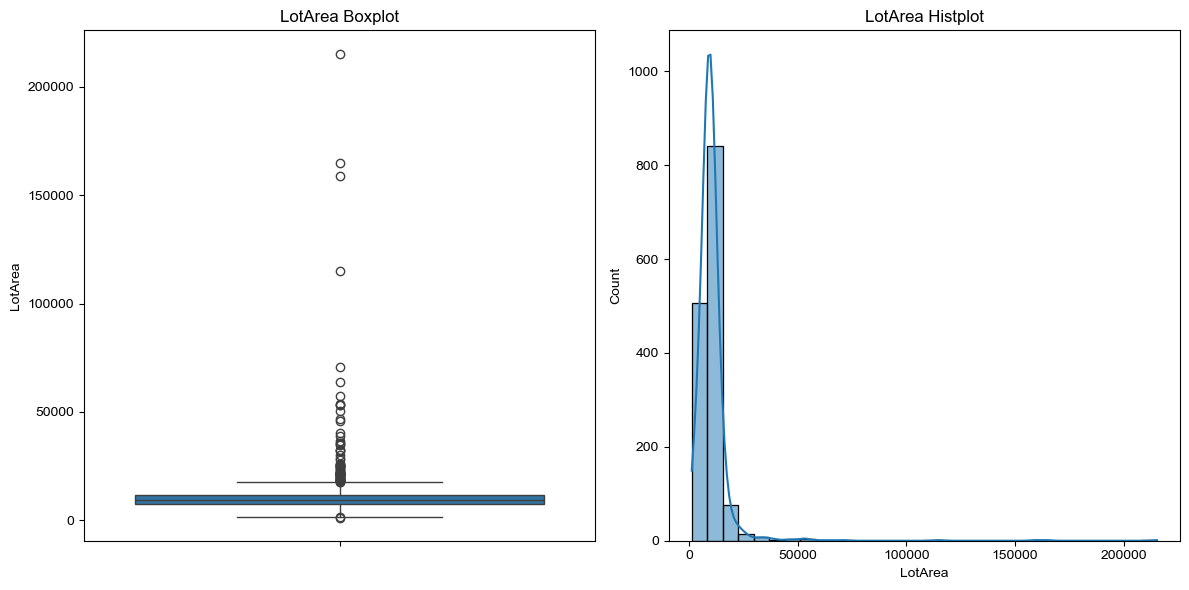

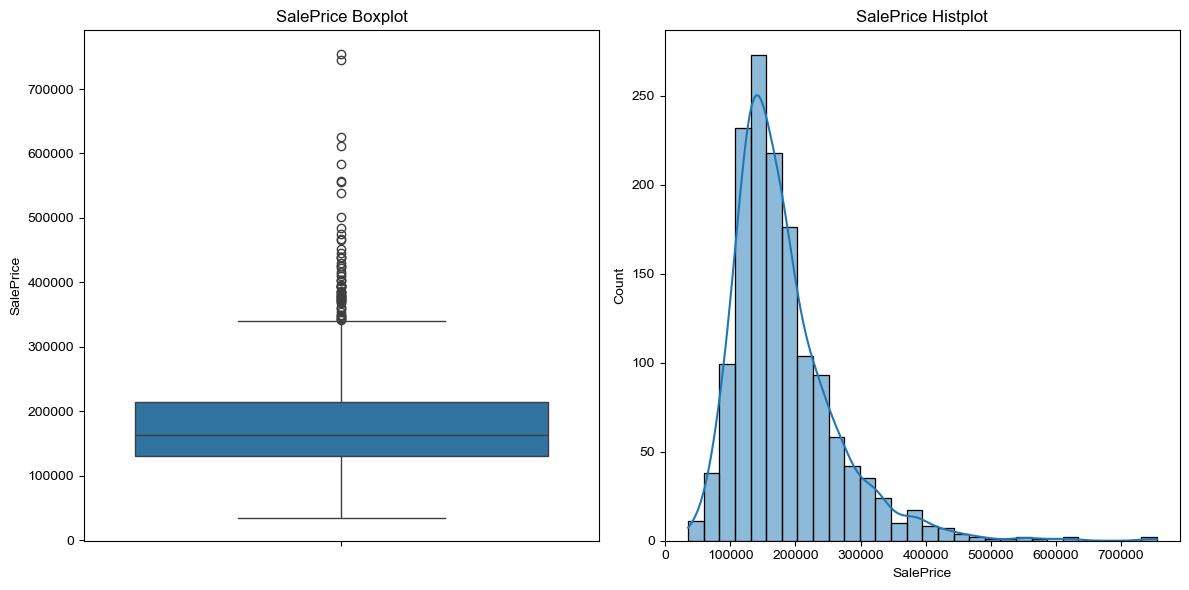

In [30]:
# 전체 IQR 값이 이상치 평균 이상인 변수 상세 확인
high_iqr_cols = statistics[statistics['IQR'] >= statistics['IQR'].mean()].index

# 각 변수 시각화
for col in high_iqr_cols:
    
    plt.figure(figsize=(12, 6))
    
    # 박스플롯
    plt.subplot(1, 2, 1)
    sns.boxplot(y=num_df[col])
    plt.title(f'{col} Boxplot')
    
    # 히스토그램
    plt.subplot(1, 2, 2)
    sns.histplot(num_df[col], kde=True, bins=30)
    plt.title(f'{col} Histplot')
    
    plt.tight_layout()
    plt.show()

/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/3813382995.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Outlier Ratio (%)', data=outlier_df, palette='Blues_r')


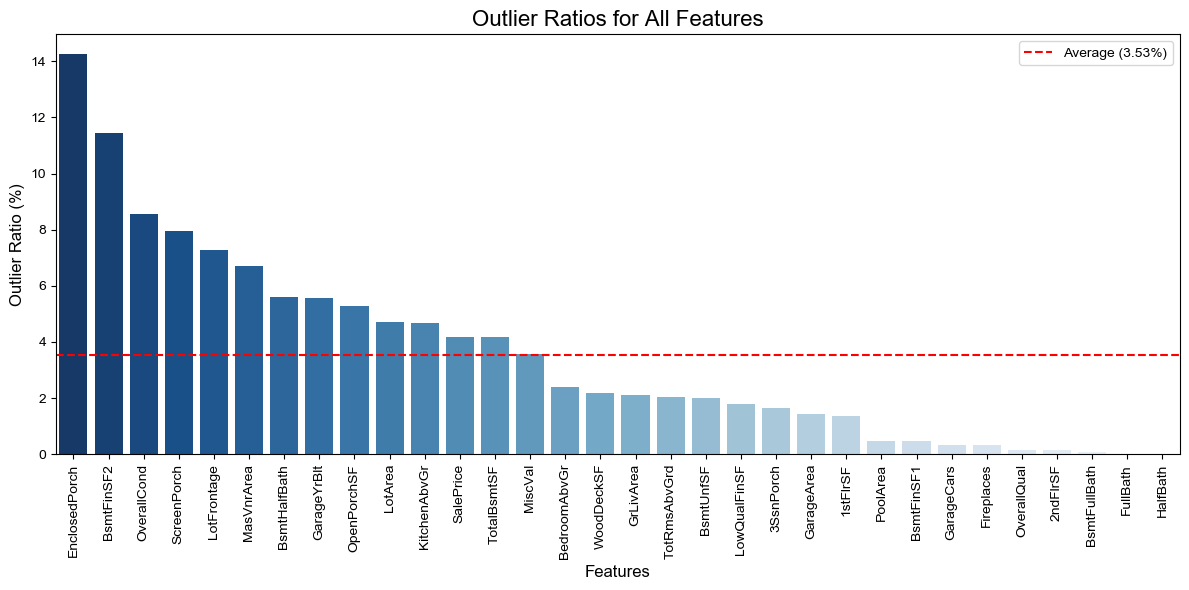


전체 데이터 이상치 비율 평균: 3.53%

평균 이상 이상치 비율을 가진 변수 개수: 14
평균 이상 이상치 비율을 가진 변수:
  - EnclosedPorch: 14.25%
  - BsmtFinSF2: 11.44%
  - OverallCond: 8.56%
  - ScreenPorch: 7.95%
  - LotFrontage: 7.26%
  - MasVnrArea: 6.71%
  - BsmtHalfBath: 5.62%
  - GarageYrBlt: 5.55%
  - OpenPorchSF: 5.27%
  - LotArea: 4.73%
  - KitchenAbvGr: 4.66%
  - SalePrice: 4.18%
  - TotalBsmtSF: 4.18%
  - MiscVal: 3.56%


In [31]:
# 이상치 시각화 및 비율 계산 함수
def iqr_analysis(df):
    outlier_ratios = {}  # 변수별 이상치 비율 저장
    for col in df.columns:
        # IQR 계산
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 이상치 탐지
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_count = outlier_mask.sum()
        outlier_ratio = (outlier_count / len(df[col])) * 100
        
        outlier_ratios[col] = outlier_ratio

    # 전체 이상치 비율 평균 계산
    average_outlier_ratio = sum(outlier_ratios.values()) / len(outlier_ratios)

    outlier_df = pd.DataFrame(list(outlier_ratios.items()), columns=['Column', 'Outlier Ratio (%)'])
    outlier_df = outlier_df.sort_values(by='Outlier Ratio (%)', ascending=False).reset_index(drop=True)

    # 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Column', y='Outlier Ratio (%)', data=outlier_df, palette='Blues_r')
    plt.axhline(average_outlier_ratio, color='red', linestyle='--', label=f'Average ({average_outlier_ratio:.2f}%)')  # 평균선
    plt.title('Outlier Ratios for All Features', fontsize=16)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Outlier Ratio (%)', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"\n전체 데이터 이상치 비율 평균: {average_outlier_ratio:.2f}%")
    
    # 평균 이상인 변수 필터링
    high_outlier_cols = outlier_df[outlier_df['Outlier Ratio (%)'] > average_outlier_ratio]
    print(f"\n평균 이상 이상치 비율을 가진 변수 개수: {len(high_outlier_cols)}")
    print("평균 이상 이상치 비율을 가진 변수:")
    for index, row in high_outlier_cols.iterrows():
        print(f"  - {row['Column']}: {row['Outlier Ratio (%)']:.2f}%")
    
    return outlier_df, high_outlier_cols

# 연도 및 월 컬럼 제외
excluded_cols = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']
filtered_df = num_df.drop(columns=excluded_cols)

# 함수 실행
outlier_df, high_outlier_df = iqr_analysis(filtered_df)

#### 3-2. 분포 확인

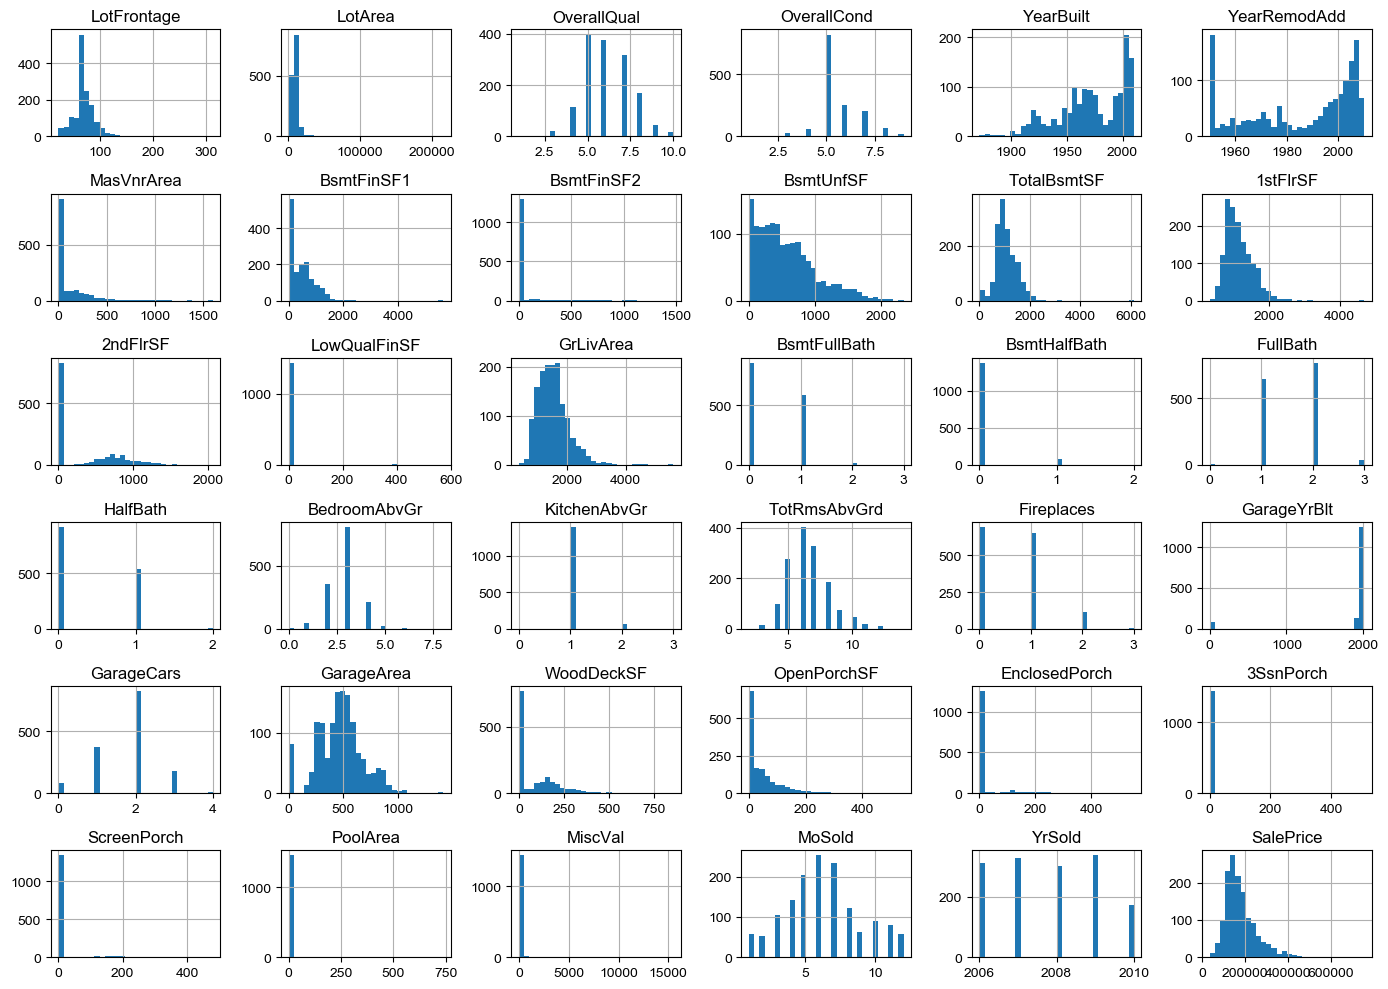

In [32]:
num_df.hist(bins=30, figsize=(14, 10)) # 분포 확인
plt.tight_layout()
plt.show()

In [33]:
def data_type_check(df):
    objects = df.select_dtypes(include=['object']).columns
    num = df.select_dtypes(include=['number']).columns

    print(f"Str dtypes: {len(objects)}개")
    print(f"Num dtypes: {len(num)}개")

data_type_check(df)

Str dtypes: 44개
Num dtypes: 36개


In [34]:
# 정규성 검증
result = {}
for col in num_df:
    stat, p = shapiro(num_df[col]) # 정규성 검정
    result[col] = '정규 분포' if p > 0.05 else '비정규분포' # p-value: 0.05

normal_cols = []  # 정규 
non_normal_cols = []  # 비정규 
for col, dist_type in result.items(): # items: 튜플로 반환

    if dist_type == '정규 분포':
        normal_cols.append(col)
    else:
        non_normal_cols.append(col)

df_normal_cols = num_df[normal_cols] # 정규 
df_non_nomal_cols = num_df[non_normal_cols] # 비정규 

print(f"정규 분포 Length: {df_normal_cols.shape[1]}")  
print(f"비정규 분포 Length: {df_non_nomal_cols.shape[1]}")      

정규 분포 Length: 0
비정규 분포 Length: 36


In [35]:
# 비정규 분포 기초 통계 확인
non_normal_cols_stat = df_non_nomal_cols.describe().T
non_normal_cols_stat['IQR'] = non_normal_cols_stat['75%'] - non_normal_cols_stat['25%'] # IQR 추가(이상치 추가)
non_normal_cols_stat.sort_values(by=['IQR'], ascending=False, inplace=True)
non_normal_cols_stat

,count,mean,std,min,25%,50%,75%,max,IQR
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0,84025.00
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,4048.00
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0,728.00
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,712.25
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0,647.25
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0,585.00
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0,509.25
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0,502.50
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0,241.50
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.00,0.0,168.00,857.0,168.00


#### 3-3. 상관관계 분석
- 위 이상치 분석 결과 평균 이상치보다 높은 변수는 총 13개로 확인
- 또한 IQR 값이 평균 이상인 변수는 SalePrcie, LotArea 나타난다.
- 하여 위 변수들을 기준으로 상관계수 확인

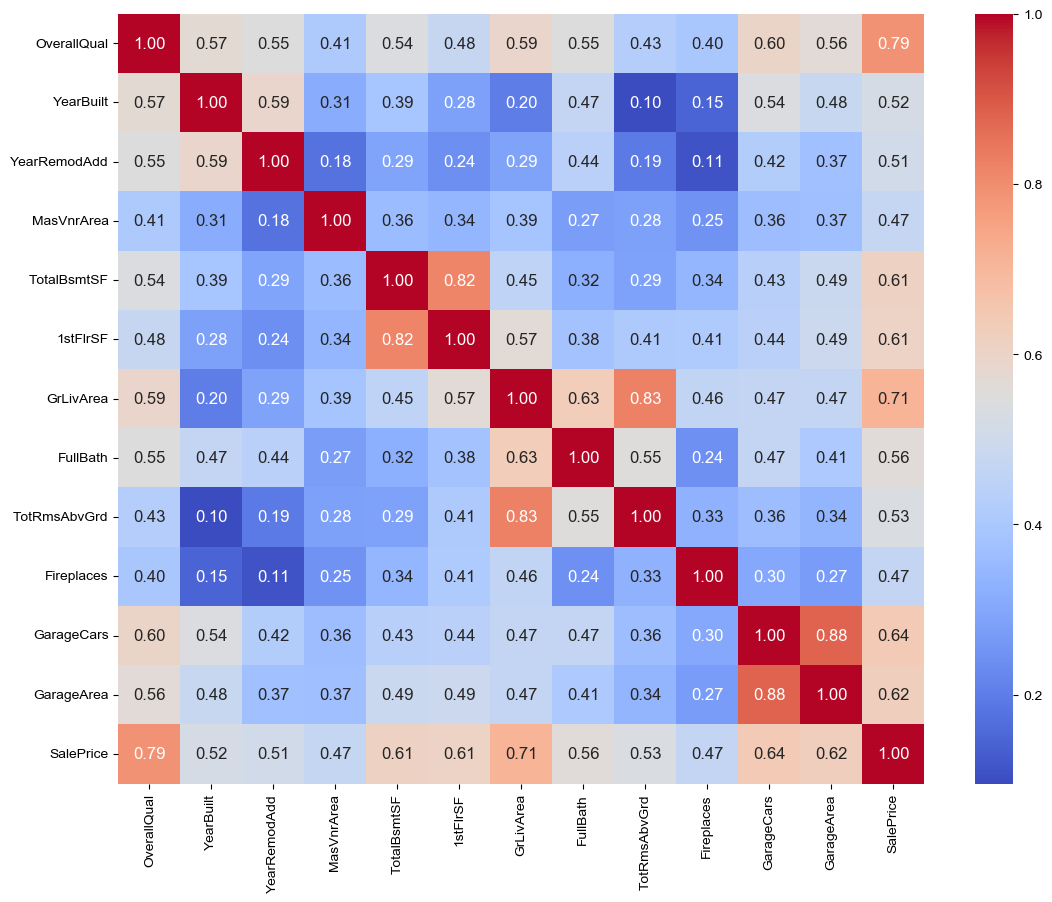

In [36]:
# 상관계수
corr_df = num_df.corr()
corr_columns = corr_df.index[abs(corr_df["SalePrice"]) >= 0.4] # 상관계수 0.4 이상만 포함
corr_columns
      
# 히트맵
plt.figure(figsize=(13,10))
sns.heatmap(num_df[corr_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 12}, cbar=True)
plt.show()


In [37]:
def target_corr_draw(df, target_col, threshold=0.4, cmap='Reds'):

    # 상관관계 계산 및 타겟 변수와의 상관관계 추출
    corr_series = df.corr()[target_col].drop(target_col)  # 자기 자신 제외
    corr_filtered = corr_series[abs(corr_series) >= threshold].sort_values(ascending=False)  # 기준 필터

    # 상관관계 히트맵 시각화
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        corr_filtered.to_frame(name='Correlation'),
        annot=True, fmt='.2f', cmap=cmap,
        annot_kws={"size": 12}, cbar=True
    )
    plt.title(f'Correlation with {target_col}', fontsize=16)
    plt.show()

    # 데이터프레임으로 반환
    corr_df = corr_filtered.reset_index()
    corr_df.columns = ['Variable', 'Correlation']

    return corr_df

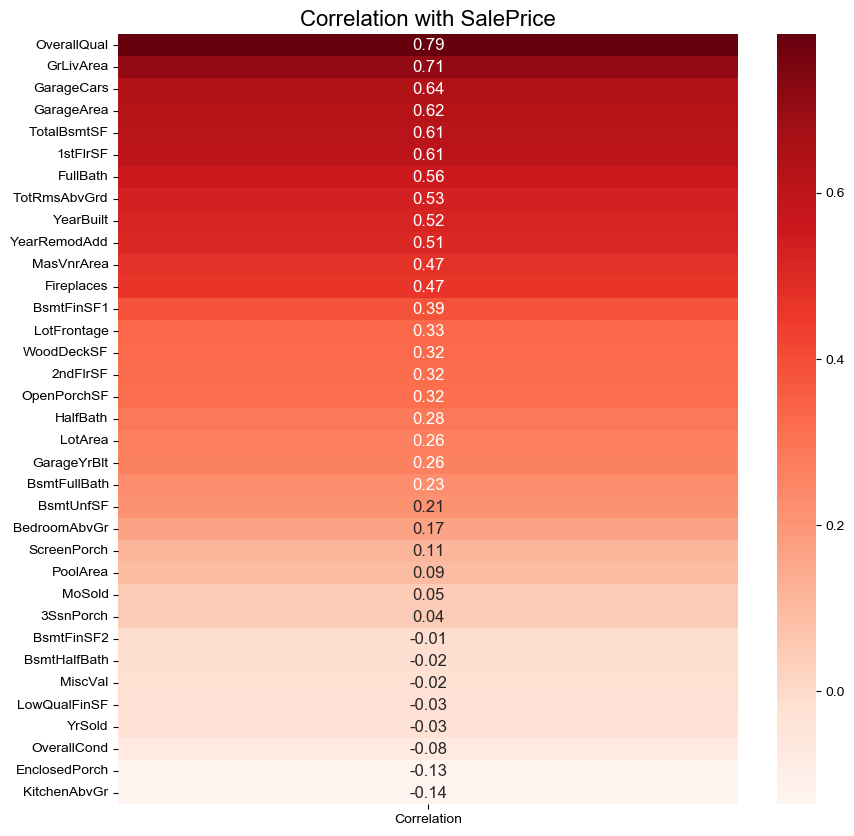

In [38]:
salePrice_corr = target_corr_draw(num_df, target_col='SalePrice', threshold=0)

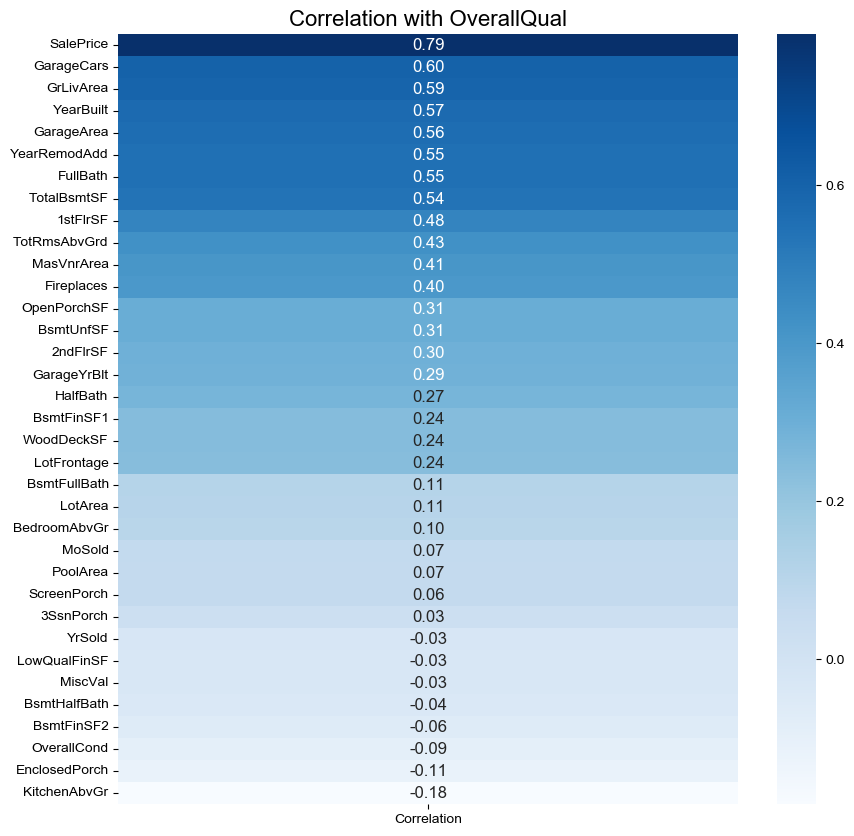

In [39]:
OverallQual_corr = target_corr_draw(num_df, target_col='OverallQual', cmap='Blues', threshold=0)

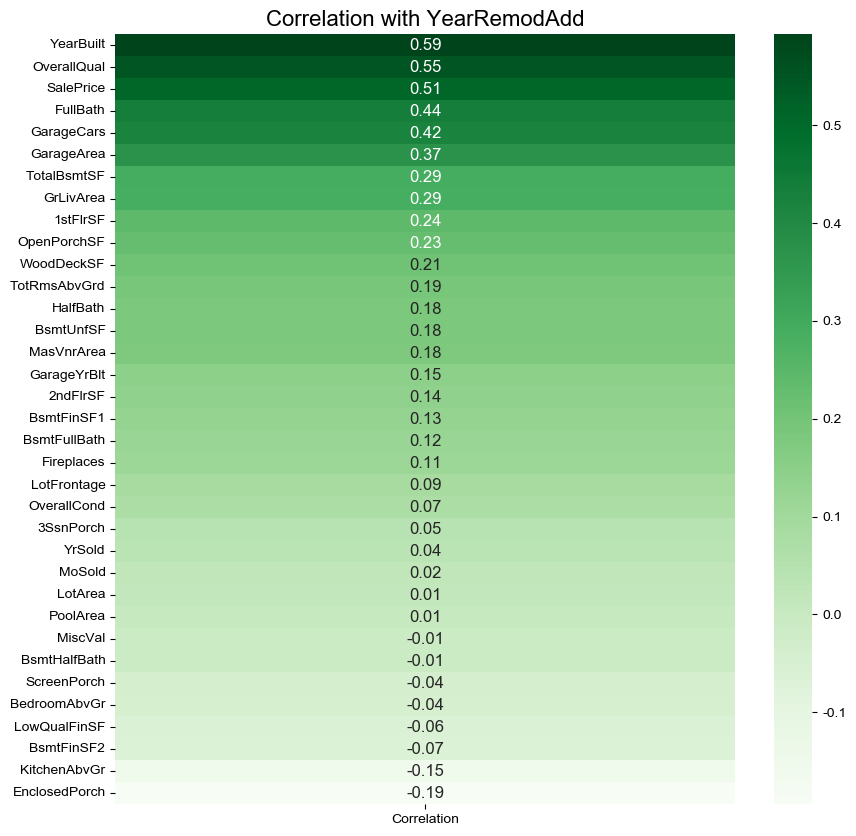

In [40]:
YearRemodAdd_corr = target_corr_draw(num_df, target_col='YearRemodAdd', cmap='Greens', threshold=0)

#### 3-4. 회귀 분석

In [41]:
# 선형 시각화 함수
def linear_plot(df, target_col, features, figsize=(10, 8), nrows=4, ncols=3):
    num_plots = len(features)
    plt.figure(figsize=figsize)

    for i, col in enumerate(features):
        plt.subplot(nrows, ncols, i + 1)
        sns.regplot(
            x=df[col], 
            y=df[target_col], 
            scatter_kws={'s': 10}, 
            line_kws={'color': 'red'}
        )
        plt.title(f'{col} vs {target_col}')

    plt.tight_layout()
    plt.show()

In [42]:
# SalePrice 와 관계가 있는 변수 필터링 (기준 0.4 이상) 
sale_Regression = salePrice_corr[salePrice_corr['Correlation'] >= 0.4]
sale_Regression = sale_Regression['Variable'].tolist()

# SalePrice 와 가장 상관계수가 높은 OverallQual 변수와 다른 변수도 확인
Over_Regression = OverallQual_corr[OverallQual_corr['Correlation'] >= 0.4]
Over_Regression = OverallQual_corr['Variable'].tolist() 

YearRemod_Regression = YearRemodAdd_corr[YearRemodAdd_corr['Correlation'] >= 0.4]
YearRemod_Regression = YearRemod_Regression['Variable'].tolist()


print(f"SalePrice corr Length: {len(sale_Regression)}")
print(f"YearRemodAdd corr Length: {len(YearRemod_Regression)}")
print(f"OverallQual corr Length: {len(Over_Regression)}")

SalePrice corr Length: 12
YearRemodAdd corr Length: 5
OverallQual corr Length: 35


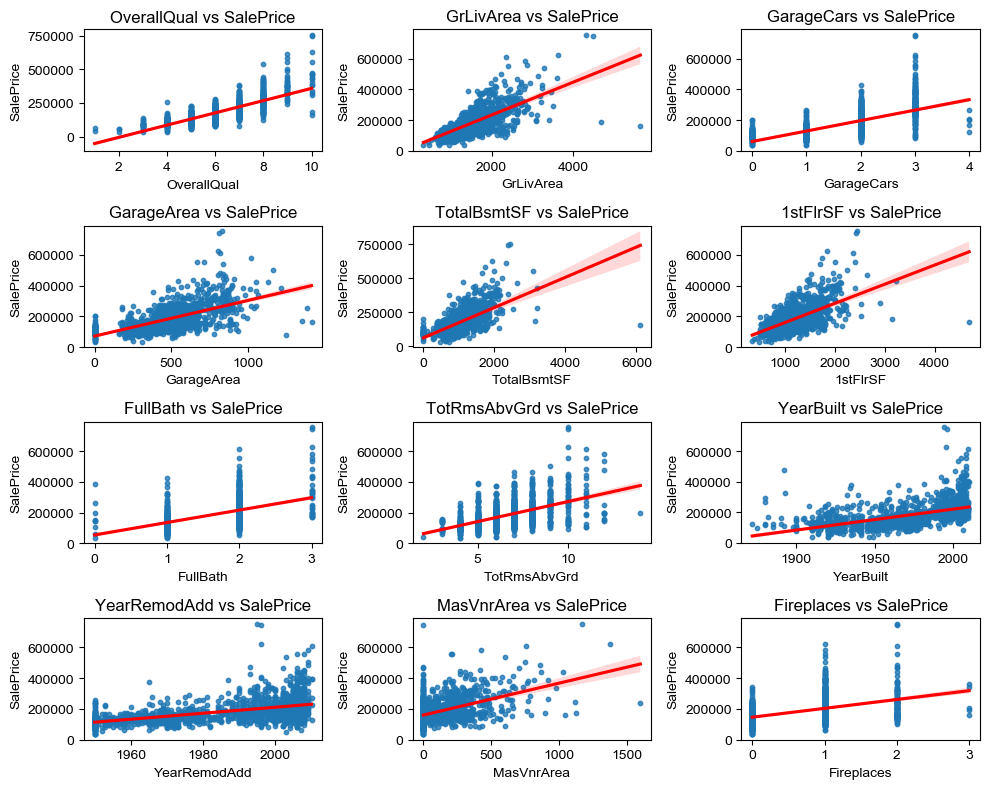

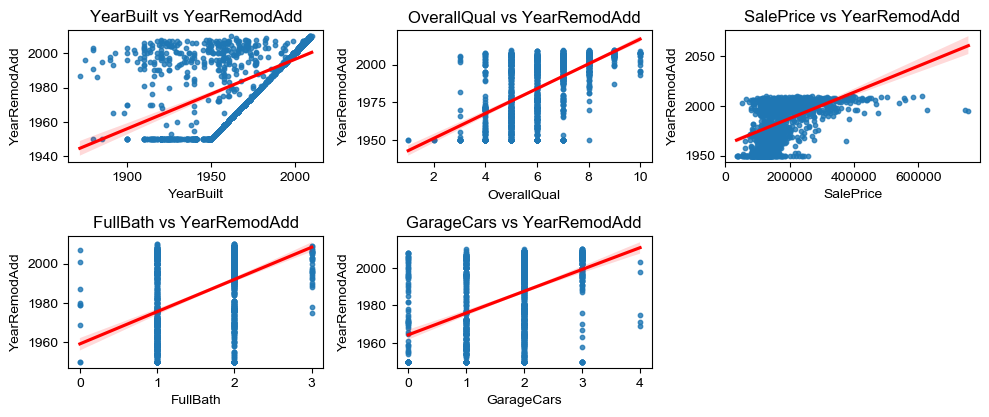

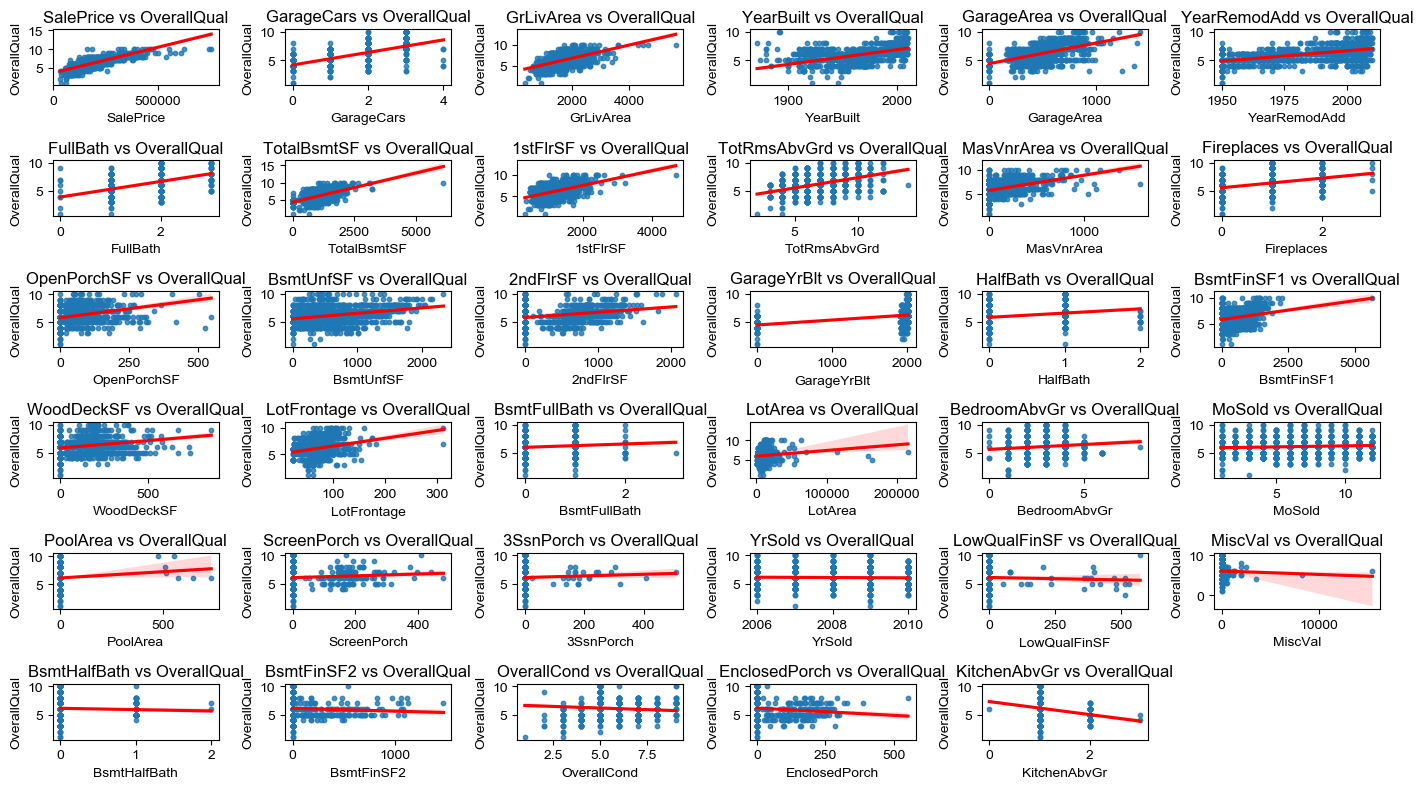

In [43]:
linear_plot(df=num_df, target_col='SalePrice', features=sale_Regression)
linear_plot(df=num_df, target_col='YearRemodAdd', features=YearRemod_Regression)
linear_plot(df=num_df, target_col='OverallQual', features=Over_Regression, figsize=(14,8), ncols=6, nrows=6)

In [44]:
# 연도별 평균 판매 가격 시각화 함수 (라인플롯 + 박스플롯)
def year_month_draw(df, col, year, palette='Blues'):
    df = df.copy()
    group = df.groupby(year)[col].mean().reset_index().sort_values(by=[col], ascending=True)  # 판매 가격 기준 내림차순
    order = group[year]

    # 서브플롯
    fig, axes = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 2]})

    # 라인플롯
    sns.lineplot(ax=axes[0], x=year, y=col, data=group, marker='o', color='blue')
    axes[0].set_title(f'Average {col} by {year}', fontsize=16)
    axes[0].set_xlabel(f'{year}', fontsize=12)
    axes[0].set_ylabel(f'{col}', fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # 박스플롯
    unique_years = df[year].unique()
    colors = sns.color_palette(palette, len(unique_years))  # 연도별 색상 
    sns.boxplot(ax=axes[1], x=year, y=col, data=df, order=order, palette=colors)
    axes[1].set_title(f'{col} by {year}', fontsize=16)
    axes[1].set_xlabel(f'{year}', fontsize=12)
    axes[1].set_ylabel(f'{col}', fontsize=12)
    axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/2596545381.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x=year, y=col, data=df, order=order, palette=colors)


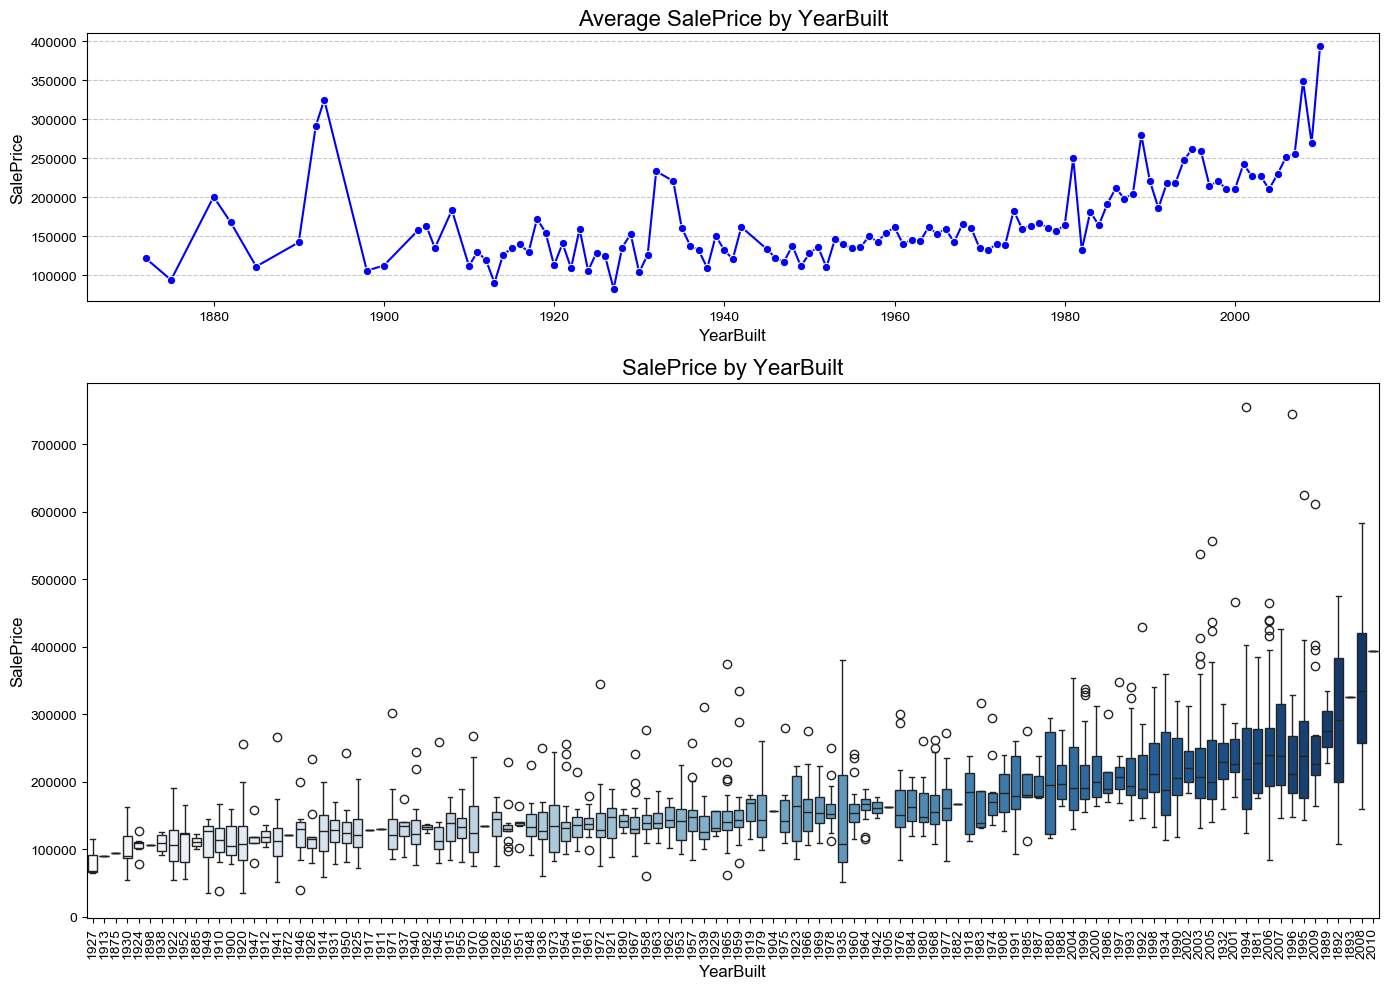

/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_4347/2596545381.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x=year, y=col, data=df, order=order, palette=colors)


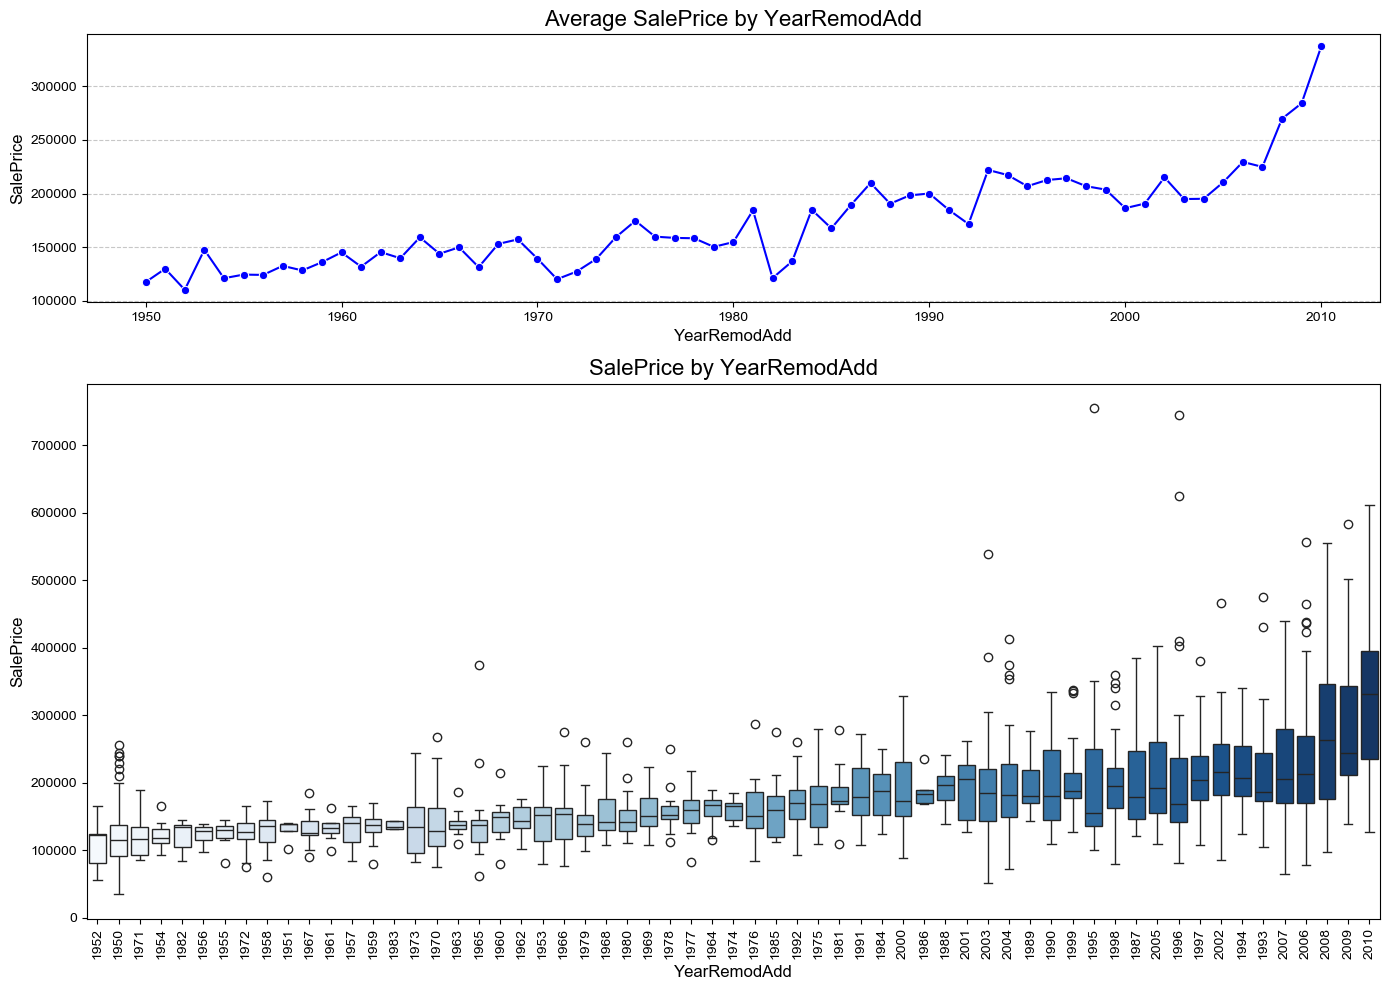

In [45]:
# 건축 연도, 리모델링 연도
draw_cols = ['YearBuilt', 'YearRemodAdd']
for cols in draw_cols:
    year_month_draw(num_df, 'SalePrice', cols)

In [46]:
class Multivariate_Regression:
    def __init__(self, df):
        self.df = df.copy()

    # VIF 다중공선성 확인
    def VIF(self, df):
        vif_data = df.copy()
        vif_with_constant = add_constant(vif_data)

        vif = pd.DataFrame()
        vif['features'] = vif_with_constant.columns
        vif['VIF'] = [round(variance_inflation_factor(vif_with_constant.values, i), 4)
                      for i in range(vif_with_constant.shape[1])]

        vif = vif.sort_values('VIF', ascending=False).reset_index(drop=True)
        vif = vif[vif['features'] != 'const']
        return vif


    # 다변량 회귀 분석
    def multivariate_regression(self, target_cols, drop_col=None):
        df = self.df.copy()
        vif_before = self.VIF(df) # VIF 계산 (drop_col 적용 전)

        if drop_col:
            df = df.drop(columns=drop_col, errors='ignore')

        X = df.drop(columns=target_cols)
        y = df[target_cols]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # 스케일링
        scaler = RobustScaler()
        X_scaled = scaler.fit_transform(X_train)

        # 모델 학습
        model = LinearRegression()
        model.fit(X_scaled, y_train)
        y_pred = model.predict(scaler.transform(X_test))

        # 모델 평가
        r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
        mse = mean_squared_error(y_test, y_pred)
        print(f"R² Score (Average): {r2:.2f}")
        print(f"MSE: {mse:.2f}")

        # 회귀 계수 및 p-value 계산
        X_with_const = add_constant(X_train)  # 상수항 추가
        ols_model = OLS(y_train, X_with_const).fit()
        p_values = ols_model.pvalues.iloc[1:]  # 상수항 제외
        coeffs = pd.DataFrame({
            'Feature': X.columns,
            'coef': model.coef_[0],  # 첫 번째 타겟 변수 기준
            'p-value': p_values})

        # VIF 계산 (drop_col 적용 후)
        vif_after = self.VIF(df.drop(columns=target_cols, errors='ignore'))

        # 병합
        final_df = pd.merge(coeffs, vif_after, left_on='Feature', right_on='features').drop(columns='features')
        final_df = final_df.sort_values(by='coef', ascending=False).reset_index(drop=True)
        not_p_value = final_df[final_df['p-value'] >= 0.05].sort_values(by='coef', ascending=False).reset_index(drop=True)
        
        return vif_before, final_df, not_p_value


    # 함수 통합
    def run_all(self, target_cols, drop_col=None):
        vif_before, final_df, not_p_value = self.multivariate_regression(target_cols, drop_col)
        return vif_before, final_df, not_p_value

In [47]:
regression = Multivariate_Regression(num_df) # 호출

# VIF 계산 (drop_col 적용 전)
vif_before = regression.VIF(num_df)
vif_before

/Users/mungughyeon/miniforge3/envs/ds_study/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,TotalBsmtSF,inf
1,GrLivArea,inf
2,LowQualFinSF,inf
3,2ndFlrSF,inf
4,1stFlrSF,inf
5,BsmtFinSF1,inf
6,BsmtFinSF2,inf
7,BsmtUnfSF,inf
9,GarageCars,6.1780
10,GarageArea,5.3106


In [48]:
# YearRemodAdd 와 관계 확인
vif_before, final_results, not_p_value_Remod = regression.run_all(target_cols=['YearRemodAdd'])
not_p_value_Remod # p-value >= 0.05 필터 결과 : 유의미하지 않음

/Users/mungughyeon/miniforge3/envs/ds_study/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/mungughyeon/miniforge3/envs/ds_study/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


R² Score (Average): 0.53
MSE: 192.97


,Feature,coef,p-value,VIF
0,BsmtHalfBath,3.210902,0.082556,1.1459
1,TotRmsAbvGrd,2.152413,0.055406,4.8959
2,2ndFlrSF,1.050921,0.352032,inf
3,OpenPorchSF,0.851193,0.076169,1.2196
4,1stFlrSF,0.631788,0.352723,inf
5,WoodDeckSF,0.480591,0.411624,1.2194
6,MoSold,0.236117,0.613920,1.0483
7,LowQualFinSF,0.015174,0.088884,inf
8,EnclosedPorch,0.008075,0.278630,1.2820
9,3SsnPorch,0.005820,0.656344,1.0235


In [49]:
# SalePrice 와 관계 확인
vif_before, final_results, not_p_value_sale = regression.run_all(target_cols=['SalePrice'])
not_p_value_sale

/Users/mungughyeon/miniforge3/envs/ds_study/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


R² Score (Average): 0.83
MSE: 1329739542.35


/Users/mungughyeon/miniforge3/envs/ds_study/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,coef,p-value,VIF
0,2ndFlrSF,8696.056545,0.059579,inf
1,GarageArea,2681.232376,0.306752,5.3072
2,FullBath,1461.122193,0.646141,2.9297
3,3SsnPorch,49.037394,0.134600,1.0231
4,EnclosedPorch,13.548124,0.468451,1.2833
5,MiscVal,-0.077640,0.966838,1.0232
6,BsmtFinSF2,-3.402271,0.843709,inf
7,LowQualFinSF,-3.691677,0.829193,inf
8,MoSold,-29.714639,0.979796,1.0483
9,PoolArea,-30.141478,0.250106,1.1016


In [50]:
# 병합 전 중복 변수 확인
duplicates = pd.concat([not_p_value_sale, not_p_value_Remod], axis=0) \
    .duplicated(subset=['Feature'], keep=False)  # 중복된 값 확인
duplicate_features = pd.concat([not_p_value_sale, not_p_value_Remod], axis=0)[duplicates]['Feature'].unique()
print(f"중복 변수 개수: {len(duplicate_features)}")

# 위 두 타겟 변수와 유의미하지 않는 변수 병합
not_p_value = pd.concat([not_p_value_sale, not_p_value_Remod], axis=0) \
    .drop_duplicates(subset=['Feature']).reset_index(drop=True)
not_p_value

중복 변수 개수: 13


,Feature,coef,p-value,VIF
0,2ndFlrSF,8696.056545,0.059579,inf
1,GarageArea,2681.232376,0.306752,5.3072
2,FullBath,1461.122193,0.646141,2.9297
3,3SsnPorch,49.037394,0.134600,1.0231
4,EnclosedPorch,13.548124,0.468451,1.2833
5,MiscVal,-0.077640,0.966838,1.0232
6,BsmtFinSF2,-3.402271,0.843709,inf
7,LowQualFinSF,-3.691677,0.829193,inf
8,MoSold,-29.714639,0.979796,1.0483
9,PoolArea,-30.141478,0.250106,1.1016


## 주요 변수 선정
1. 범주형 변수 선정
2. 수치형 변수 선정

#### 1. 범주형 변수 선정

In [51]:
mode_analysis = mode_analysis.rename(columns={'컬럼명':'Column'}) # 병합을 위해 변경
object_import = pd.merge(object_result, mode_analysis, on='Column', how='left')
object_import = object_import[~object_import['Column'].isin(NO_H_test['Column'].tolist())] # p-value 기준 0.05 이하 제외

object_import = object_import.sort_values(by=['p-value']).reset_index(drop=True)
object_import

,Column,Kruskal-Wallis Statistic,p-value,최빈값,비율(%),고유값 개수,고유값 상태
0,Neighborhood,868.532376,6.696799e-168,NAmes,15.41,25,평균 이상
1,ExterQual,683.440084,8.180798e-148,TA,62.05,4,평균 이하
2,BsmtQual,674.410861,1.209826e-144,TA,44.45,5,평균 이하
3,KitchenQual,661.481587,4.720113e-143,TA,50.34,4,평균 이하
4,GarageFinish,609.808380,7.534250e-132,Unf,41.44,4,평균 이하
5,GarageType,532.695615,7.581344e-112,Attchd,59.59,7,평균 이상
6,MSSubClass,531.535770,1.896860e-104,20,36.71,15,평균 이상
7,Foundation,488.722751,2.169096e-103,PConc,44.32,6,평균
8,FireplaceQu,461.899625,1.331155e-97,No_FireplaceQu,47.26,6,평균
9,HeatingQC,356.776407,6.036449e-76,Ex,50.75,5,평균 이하


#### 2. 수치형 변수 선정

In [52]:
# 위 두 변수에 대한 회귀 결과 p-value > 0.05
duplicate_features

array(['2ndFlrSF', 'GarageArea', '3SsnPorch', 'EnclosedPorch', 'MiscVal',
       'BsmtFinSF2', 'LowQualFinSF', 'MoSold', 'PoolArea', 'OpenPorchSF',
       'LotFrontage', 'HalfBath', 'BsmtHalfBath'], dtype=object)

In [53]:
# 타겟 변수와의 상관관계 수치 확인
dup_salePrice_corr = salePrice_corr[salePrice_corr['Variable'].isin(duplicate_features)]
dup_salePrice_corr

,Variable,Correlation
3,GarageArea,0.623431
13,LotFrontage,0.329220
15,2ndFlrSF,0.319334
16,OpenPorchSF,0.315856
17,HalfBath,0.284108
24,PoolArea,0.092404
25,MoSold,0.046432
26,3SsnPorch,0.044584
27,BsmtFinSF2,-0.011378
28,BsmtHalfBath,-0.016844


In [54]:
# 타겟 변수와의 상관관계 수치 확인
dup_YearRemodAdd_corr = YearRemodAdd_corr[YearRemodAdd_corr['Variable'].isin(duplicate_features)]
dup_YearRemodAdd_corr

,Variable,Correlation
5,GarageArea,0.371600
9,OpenPorchSF,0.226298
12,HalfBath,0.183331
16,2ndFlrSF,0.140024
20,LotFrontage,0.087325
22,3SsnPorch,0.045286
24,MoSold,0.021490
26,PoolArea,0.005829
27,MiscVal,-0.010286
28,BsmtHalfBath,-0.012337


In [55]:
salePrice_corr = salePrice_corr.rename(columns={'Variable': 'Feature', 'Correlation': 'Corr'})

# p-value 기준으로 주요 변수 필터링 (MoSold와 YrSold 강제 포함)
num_import = final_results[
    (final_results['p-value'] < 0.05) | 
    (final_results['Feature'].isin(['MoSold', 'YrSold']))]

# 상관계수 병합
num_import = pd.merge(num_import, salePrice_corr, on='Feature', how='left')

# 상관계수 기준 필터링 (MoSold, YrSold는 제외 조건 적용)
num_import = num_import[
    (num_import['Corr'].abs() >= 0.3) | 
    (num_import['Feature'].isin(['MoSold', 'YrSold']))].sort_values(by=['Corr'], ascending=False).reset_index(drop=True)

num_import

,Feature,coef,p-value,VIF,Corr
0,OverallQual,33747.543524,4.451070e-35,3.2227,0.790982
1,GrLivArea,16737.903561,5.554578e-05,inf,0.708624
2,GarageCars,16180.065785,1.862895e-06,6.0674,0.640409
3,TotalBsmtSF,5257.116700,3.617341e-02,inf,0.613581
4,1stFlrSF,8817.974847,1.200379e-02,inf,0.605852
5,TotRmsAbvGrd,12022.070992,1.851839e-05,4.8331,0.533723
6,YearBuilt,16191.723881,7.702613e-07,4.0877,0.522897
7,YearRemodAdd,5636.520649,4.616917e-02,2.2790,0.507101
8,MasVnrArea,3293.215284,4.822013e-03,1.3980,0.472614
9,Fireplaces,4770.189839,1.573260e-02,1.5675,0.466929


In [56]:
# 최종 데이터 병함
object_features = object_import['Column'].tolist() # 범주형 데이터
num_features = num_import['Feature'].tolist() # 수치형 데이터

final_features = object_features + num_features + ['SalePrice']
final_df = df[final_features].copy()
data_type_check(final_df)
final_df

Str dtypes: 37개
Num dtypes: 15개


,Neighborhood,ExterQual,BsmtQual,KitchenQual,GarageFinish,GarageType,MSSubClass,Foundation,FireplaceQu,HeatingQC,...,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,MoSold,YrSold,SalePrice
0,CollgCr,Gd,Gd,Gd,RFn,Attchd,60,PConc,No_FireplaceQu,Ex,...,8,2003,2003,196.0,0,706,0,2,2008,208500
1,Veenker,TA,Gd,TA,RFn,Attchd,20,CBlock,TA,Ex,...,6,1976,1976,0.0,1,978,298,5,2007,181500
2,CollgCr,Gd,Gd,Gd,RFn,Attchd,60,PConc,TA,Ex,...,6,2001,2002,162.0,1,486,0,9,2008,223500
3,Crawfor,TA,TA,Gd,Unf,Detchd,70,BrkTil,Gd,Gd,...,7,1915,1970,0.0,1,216,0,2,2006,140000
4,NoRidge,Gd,Gd,Gd,RFn,Attchd,60,PConc,TA,Ex,...,9,2000,2000,350.0,1,655,192,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,TA,Gd,TA,RFn,Attchd,60,PConc,TA,Ex,...,7,1999,2000,0.0,1,0,0,8,2007,175000
1456,NWAmes,TA,Gd,TA,Unf,Attchd,20,CBlock,TA,TA,...,7,1978,1988,119.0,2,790,349,2,2010,210000
1457,Crawfor,Ex,TA,Gd,RFn,Attchd,70,Stone,Gd,Ex,...,9,1941,2006,0.0,2,275,0,5,2010,266500
1458,NAmes,TA,TA,Gd,Unf,Attchd,20,CBlock,No_FireplaceQu,Gd,...,5,1950,1996,0.0,0,49,366,4,2010,142125


-------

## 결론

- 시계열 데이터: 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'
- **리모델링은** 주택 **판매가격에** 유의미한 영향을 미치는 중요한 요인으로 확인됨.
- 리모델링 연도와 판매가격 간의 높은 **상관계수(0.52)**를 기반으로 가치 상승에 긍정적인 효과가 있음.
- 주택 시장에서 리모델링 여부는 구매자의 의사결정에 **중요한 지표로** 작용하며, 회귀 분석 결과 이를 뒷받침함.
- 추가적으로 시간 흐름과 지역적 특성에 따라 리모델링 효과가 달라질 수 있어, 이를 고려한 심층 분석이 필요함.

In [58]:
# final_df.to_csv("../data/feature_important.csv")